# **Atividade I - Análise e Visualização de Dados - Analise Exploratória dos Dados**


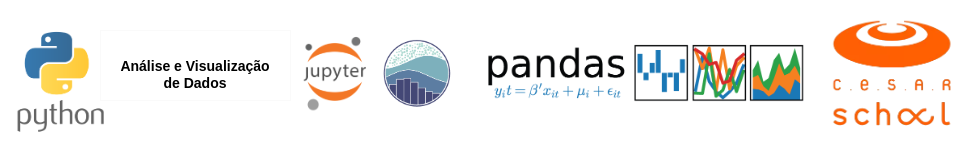

**Grupo**


*   Alberto de Moraes Barbosa (amb3@cesar.school)
*   Erick Anderson Ferreira Silva(eafs@cesar.school)
*   Hugo Vasconcelos Ferraz (hvfc@cesar.school)


# 1 - Escolha do dataset


Fonte: https://dados.gov.br/dados/conjuntos-dados/grandes-nmeros-do-imposto-de-renda-da-pessoa-fsica

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import textwrap

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# receita = pd.read_csv('/content/drive/Shareddrives/Dados/Visualização/rendimentos-isentos-e-nao-tributaveis.csv', sep=';')

In [2]:
receita = pd.read_csv('rendimentos-isentos-e-nao-tributaveis.csv', sep=';')

# 2 - Entendimento do conjuto de dados

Este dataset contém uma lista de rendimentos isentos de tributação ou não-tributáveis, conforme a legislação fiscal brasileira. Ele inclui categorias como bolsas de estudo e pesquisa, ganhos de capital em determinadas condições, lucros e dividendos recebidos, e isenções para aposentadorias e pensões. Esses dados são úteis para a declaração de imposto de renda, pois ajudam a identificar quais rendimentos podem ser informados como isentos, permitindo o correto preenchimento da declaração e a otimização da tributação.

**Os números apresentados estão em MILHÕES de Reais**

In [3]:
receita.head()

,Ano Calendário,Faixa de Salários-Mínimos,"Bolsas de estudo e de pesquisa caracterizadas como doação, exceto médico-residente ou Pronatec, exclusivamente para proceder a estudos ou pesquisas e desde que os resultados dessas atividades não representem vantagem para o doador, nem importem contraprestação de serviços","Bolsas de estudo e de pesquisa caracterizadas como doação, quando recebidas exclusivamente para proceder a estudos ou pesquisas, recebidas por médico-residente e por servidor da rede pública de educação profissional, científica e tecnológica que participe das atividades do Pronatec","Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente","Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS","Ganho de capital na alienação de bem, direito ou conjunto de bens ou direitos da mesma natureza, alienados em um mesmo mês, de valor total de alienação até R$ 20.000,00, para ações alienadas no mercado de balcão, e R$ 35.000,00, nos demais casos","Ganho de capital na alienação do único imóvel por valor igual ou inferior a R$ 440.000,00 e que, nos últimos 5 anos, não tenha efetuado nenhuma outra alienação de imóvel","Ganho de capital na venda de imóveis residenciais para aquisição, no prazo de 180 dias, de imóveis residenciais localizados no Brasil e redução sobre o ganho de capital","Ganho de capital na alienação de moeda estrangeira mantida em espécie cujo total de alienações, no ano-calendário, seja igual ou inferior ao equivalente a US$ 5,000.00",...,"Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações","Ganhos líquidos em operações com ouro, ativo financeiro, nas alienações realizadas até R$ 20.000,00 em cada mês","Rendimento bruto, até o máximo de 90%, da prestação de serviços decorrente do transporte de carga e com trator, máquina de terraplenagem, colheitadeira e assemelhados","Rendimento bruto, até o máximo de 40%, da prestação de serviços decorrente do transporte de passageiros",Restituição de imposto sobre a renda de anos-calendário anteriores,Outros,Parcela isenta correspondente à atividade rural,"Recuperação de prejuízos em Renda Variável (bolsa de valores, de mercadorias, de futuros e assemelhados e fundos de investimento imobiliário)",Demais Rend. isentos e não-tributáveis dos dependentes,"Benefícios ind. e reembolso desp. receb. voluntário Fifa, da Subsidiária Fifa Brasil ou Comitê Organizador Brasileiro (LOC)"
0,2020,Até 1/2,"48,81276313","12,99392111","7,66925054","1522,546074","27,02836822","0,77916638","0,96241566","0,40340154",...,"151,2313806","4,23106676","2,20752722","16,19243322","370,8569779","7244,897556","40,72832963","5,00983666","0,00659408",0
1,2020,De 1/2 a 1,"81,2265008","28,91079232","21,53044603","2307,265979","53,64741324","2,10877195","1,03012393","0,71908964",...,"157,742147","5,00837212","8,81188404","59,81245827","210,5350944","8040,335486","141,1119213","8,00762734","0,0120593",0
2,2020,De 1 a 2,"267,8818583","55,45210385","88,25605149","3360,606888","179,4412785","10,27345657","4,07344864","1,9384512",...,"254,4913927","10,53519452","43,9844561","120,4380731","242,5065746","10032,64293","611,5749087","19,30279977","0,00155117",0
3,2020,De 2 a 3,"358,2390444","171,675105","140,145674","2498,797983","262,8278302","18,02820749","7,14860394","2,07690205",...,"182,0464879","8,10416192","90,31935251","77,8501655","244,3956581","6911,56739","1068,001101","21,9483574","0,01029168",0
4,2020,De 3 a 5,"480,6428638","464,2499335","326,0079577","3816,077063","233,5250329","62,77515447","25,09719131","2,46100765",...,"238,2561345","12,03045631","342,5569111","62,45510058","206,7896816","8947,205021","3281,740045","41,81485486","0,07609103",0


In [ ]:
receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 30 columns):
 #   Column                                                                                                                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                      --------------  ----- 
 0   Ano Calendário                                                                                                                                                                                                                                                              

# 3 - Limpeza dos Dados

In [ ]:
# Retirando linhas duplicadas ou colunas não nomeadas
receita = receita.drop_duplicates()

In [ ]:
# Selecionando as colunas do tipo Object
colunas_objeto = receita.select_dtypes(include=['object']).columns

# Excluindo a coluna Faixa de Salários Mínimos da conversão
colunas_a_converter = colunas_objeto.difference([colunas_objeto[0]])

#  Substituindo as virgulas por ponto nas colunas Object e convertendo para float
receita[colunas_a_converter] = receita[colunas_a_converter].apply(lambda x: x.str.replace(',', '.')).apply(pd.to_numeric, errors='coerce')

# Iremos considerar apenas os anos de 2016 até 2020 devido a maior quantidade de dados disponíveis
receita=receita[receita['Ano Calendário']>=2016]

In [ ]:
receita.tail()

,Ano Calendário,Faixa de Salários-Mínimos,"Bolsas de estudo e de pesquisa caracterizadas como doação, exceto médico-residente ou Pronatec, exclusivamente para proceder a estudos ou pesquisas e desde que os resultados dessas atividades não representem vantagem para o doador, nem importem contraprestação de serviços","Bolsas de estudo e de pesquisa caracterizadas como doação, quando recebidas exclusivamente para proceder a estudos ou pesquisas, recebidas por médico-residente e por servidor da rede pública de educação profissional, científica e tecnológica que participe das atividades do Pronatec","Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente","Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS","Ganho de capital na alienação de bem, direito ou conjunto de bens ou direitos da mesma natureza, alienados em um mesmo mês, de valor total de alienação até R$ 20.000,00, para ações alienadas no mercado de balcão, e R$ 35.000,00, nos demais casos","Ganho de capital na alienação do único imóvel por valor igual ou inferior a R$ 440.000,00 e que, nos últimos 5 anos, não tenha efetuado nenhuma outra alienação de imóvel","Ganho de capital na venda de imóveis residenciais para aquisição, no prazo de 180 dias, de imóveis residenciais localizados no Brasil e redução sobre o ganho de capital","Ganho de capital na alienação de moeda estrangeira mantida em espécie cujo total de alienações, no ano-calendário, seja igual ou inferior ao equivalente a US$ 5,000.00",...,"Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações","Ganhos líquidos em operações com ouro, ativo financeiro, nas alienações realizadas até R$ 20.000,00 em cada mês","Rendimento bruto, até o máximo de 90%, da prestação de serviços decorrente do transporte de carga e com trator, máquina de terraplenagem, colheitadeira e assemelhados","Rendimento bruto, até o máximo de 40%, da prestação de serviços decorrente do transporte de passageiros",Restituição de imposto sobre a renda de anos-calendário anteriores,Outros,Parcela isenta correspondente à atividade rural,"Recuperação de prejuízos em Renda Variável (bolsa de valores, de mercadorias, de futuros e assemelhados e fundos de investimento imobiliário)",Demais Rend. isentos e não-tributáveis dos dependentes,"Benefícios ind. e reembolso desp. receb. voluntário Fifa, da Subsidiária Fifa Brasil ou Comitê Organizador Brasileiro (LOC)"
80,2016,De 60 a 80,7.910441,3.021450,316.216112,1512.957089,0.0,25.742816,131.342758,0.140861,...,10.084295,0.830790,57.155767,2.473809,31.361552,2173.954309,2072.170113,42.286796,0.0,0.0
81,2016,De 80 a 160,15.435636,3.854192,675.233356,1933.378172,0.0,17.482439,194.345638,2.263121,...,13.959756,2.183825,55.170495,0.763891,37.347475,3992.635348,4112.058364,93.703300,0.0,0.0
82,2016,De 160 a 240,6.830425,14.779856,283.384828,379.835204,0.0,6.009435,79.000033,2.261907,...,4.932628,0.883177,5.985847,0.003520,10.205280,1715.917763,1924.593803,62.945274,0.0,0.0
83,2016,De 240 a 320,9.536218,9.329965,143.475191,218.045179,0.0,1.708536,43.522123,0.001685,...,1.943507,0.211377,1.773991,0.000000,6.340257,1177.511863,1298.237042,31.712481,0.0,0.0
84,2016,Mais de 320,37.668660,260.066527,1040.878640,383.870317,0.0,4.074994,228.583576,0.139558,...,5.402222,0.698562,16.620783,0.044022,26.229730,11193.763640,6790.129021,310.386089,0.0,0.0


In [ ]:
receita.describe()


,Ano Calendário,"Bolsas de estudo e de pesquisa caracterizadas como doação, exceto médico-residente ou Pronatec, exclusivamente para proceder a estudos ou pesquisas e desde que os resultados dessas atividades não representem vantagem para o doador, nem importem contraprestação de serviços","Bolsas de estudo e de pesquisa caracterizadas como doação, quando recebidas exclusivamente para proceder a estudos ou pesquisas, recebidas por médico-residente e por servidor da rede pública de educação profissional, científica e tecnológica que participe das atividades do Pronatec","Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente","Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS","Ganho de capital na alienação de bem, direito ou conjunto de bens ou direitos da mesma natureza, alienados em um mesmo mês, de valor total de alienação até R$ 20.000,00, para ações alienadas no mercado de balcão, e R$ 35.000,00, nos demais casos","Ganho de capital na alienação do único imóvel por valor igual ou inferior a R$ 440.000,00 e que, nos últimos 5 anos, não tenha efetuado nenhuma outra alienação de imóvel","Ganho de capital na venda de imóveis residenciais para aquisição, no prazo de 180 dias, de imóveis residenciais localizados no Brasil e redução sobre o ganho de capital","Ganho de capital na alienação de moeda estrangeira mantida em espécie cujo total de alienações, no ano-calendário, seja igual ou inferior ao equivalente a US$ 5,000.00",Lucros e dividendos recebidos,...,"Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações","Ganhos líquidos em operações com ouro, ativo financeiro, nas alienações realizadas até R$ 20.000,00 em cada mês","Rendimento bruto, até o máximo de 90%, da prestação de serviços decorrente do transporte de carga e com trator, máquina de terraplenagem, colheitadeira e assemelhados","Rendimento bruto, até o máximo de 40%, da prestação de serviços decorrente do transporte de passageiros",Restituição de imposto sobre a renda de anos-calendário anteriores,Outros,Parcela isenta correspondente à atividade rural,"Recuperação de prejuízos em Renda Variável (bolsa de valores, de mercadorias, de futuros e assemelhados e fundos de investimento imobiliário)",Demais Rend. isentos e não-tributáveis dos dependentes,"Benefícios ind. e reembolso desp. receb. voluntário Fifa, da Subsidiária Fifa Brasil ou Comitê Organizador Brasileiro (LOC)"
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0
mean,2018.000000,131.957178,93.758640,387.624777,2245.214446,20.366023,85.734024,115.456788,0.915464,19041.233117,...,45.899440,5.159382,341.793273,40.307968,115.345630,5658.472268,3176.062686,73.726647,0.086222,0.0
std,1.422607,152.217991,136.256563,294.401552,1209.633471,52.145275,110.452809,177.930770,0.718546,24835.308226,...,50.766588,4.877825,402.487695,68.463180,90.844834,2681.873085,2224.107190,107.433839,0.331058,0.0
min,2016.000000,0.176148,0.166489,6.320486,189.311780,0.000000,0.369557,0.469195,0.001139,234.498964,...,1.943507,0.085653,1.434405,0.000000,4.701655,1177.511863,31.987643,1.346097,0.000000,0.0
25%,2017.000000,13.260437,9.329965,194.697617,1460.502340,0.000000,5.742886,16.796577,0.393827,4370.238631,...,14.144777,1.273494,16.620783,2.198650,50.399278,3935.768103,1298.237042,21.948357,0.000000,0.0
50%,2018.000000,48.880746,32.064317,355.977537,2413.876349,0.000000,20.826074,76.642079,0.803244,14293.507000,...,28.913261,4.231067,104.605323,7.834597,91.202551,5327.031728,3176.575779,44.327279,0.000000,0.0
75%,2019.000000,258.553249,140.565735,487

In [ ]:
receita.info()


<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 84
Data columns (total 30 columns):
 #   Column                                                                                                                                                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                      --------------  -----  
 0   Ano Calendário                                                                                                                                                                                                                                                                 

In [ ]:
receita.head()

,Ano Calendário,Faixa de Salários-Mínimos,"Bolsas de estudo e de pesquisa caracterizadas como doação, exceto médico-residente ou Pronatec, exclusivamente para proceder a estudos ou pesquisas e desde que os resultados dessas atividades não representem vantagem para o doador, nem importem contraprestação de serviços","Bolsas de estudo e de pesquisa caracterizadas como doação, quando recebidas exclusivamente para proceder a estudos ou pesquisas, recebidas por médico-residente e por servidor da rede pública de educação profissional, científica e tecnológica que participe das atividades do Pronatec","Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente","Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS","Ganho de capital na alienação de bem, direito ou conjunto de bens ou direitos da mesma natureza, alienados em um mesmo mês, de valor total de alienação até R$ 20.000,00, para ações alienadas no mercado de balcão, e R$ 35.000,00, nos demais casos","Ganho de capital na alienação do único imóvel por valor igual ou inferior a R$ 440.000,00 e que, nos últimos 5 anos, não tenha efetuado nenhuma outra alienação de imóvel","Ganho de capital na venda de imóveis residenciais para aquisição, no prazo de 180 dias, de imóveis residenciais localizados no Brasil e redução sobre o ganho de capital","Ganho de capital na alienação de moeda estrangeira mantida em espécie cujo total de alienações, no ano-calendário, seja igual ou inferior ao equivalente a US$ 5,000.00",...,"Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações","Ganhos líquidos em operações com ouro, ativo financeiro, nas alienações realizadas até R$ 20.000,00 em cada mês","Rendimento bruto, até o máximo de 90%, da prestação de serviços decorrente do transporte de carga e com trator, máquina de terraplenagem, colheitadeira e assemelhados","Rendimento bruto, até o máximo de 40%, da prestação de serviços decorrente do transporte de passageiros",Restituição de imposto sobre a renda de anos-calendário anteriores,Outros,Parcela isenta correspondente à atividade rural,"Recuperação de prejuízos em Renda Variável (bolsa de valores, de mercadorias, de futuros e assemelhados e fundos de investimento imobiliário)",Demais Rend. isentos e não-tributáveis dos dependentes,"Benefícios ind. e reembolso desp. receb. voluntário Fifa, da Subsidiária Fifa Brasil ou Comitê Organizador Brasileiro (LOC)"
0,2020,Até 1/2,48.812763,12.993921,7.669251,1522.546074,27.028368,0.779166,0.962416,0.403402,...,151.231381,4.231067,2.207527,16.192433,370.856978,7244.897556,40.728330,5.009837,0.006594,0.0
1,2020,De 1/2 a 1,81.226501,28.910792,21.530446,2307.265979,53.647413,2.108772,1.030124,0.719090,...,157.742147,5.008372,8.811884,59.812458,210.535094,8040.335486,141.111921,8.007627,0.012059,0.0
2,2020,De 1 a 2,267.881858,55.452104,88.256051,3360.606888,179.441279,10.273457,4.073449,1.938451,...,254.491393,10.535195,43.984456,120.438073,242.506575,10032.642930,611.574909,19.302800,0.001551,0.0
3,2020,De 2 a 3,358.239044,171.675105,140.145674,2498.797983,262.827830,18.028207,7.148604,2.076902,...,182.046488,8.104162,90.319353,77.850166,244.395658,6911.567390,1068.001101,21.948357,0.010292,0.0
4,2020,De 3 a 5,480.642864,464.249933,326.007958,3816.077063,233.525033,62.775154,25.097191,2.461008,...,238.256135,12.030456,342.556911,62.455101,206.789682,8947.205021,3281.740045,41.814855,0.076091,0.0


# 4 - Análise de Outliers

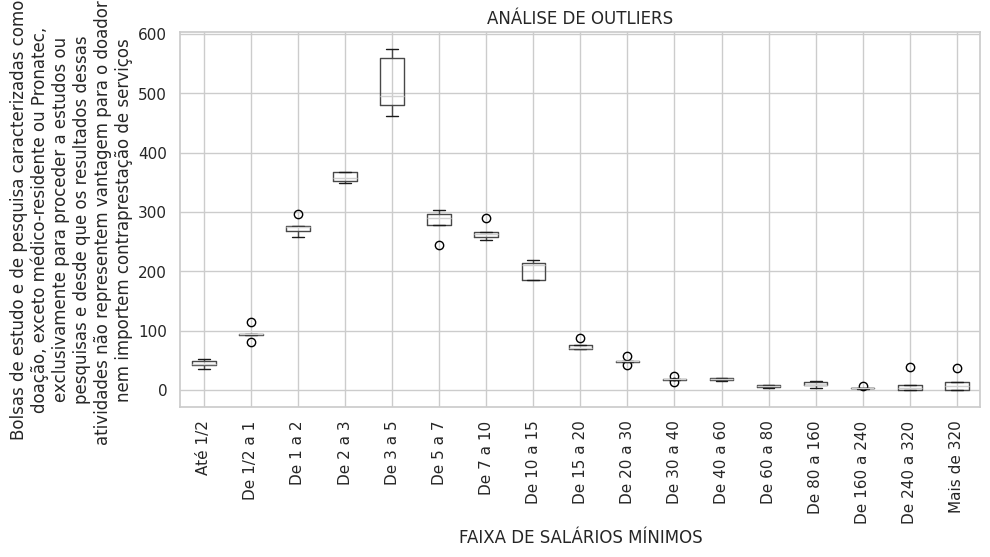

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Bolsas de estudo e de pesquisa caracterizadas como doação, exceto médico-residente ou Pronatec, exclusivamente para proceder a estudos ou pesquisas e desde que os resultados dessas atividades não representem vantagem para o doador, nem importem contraprestação de serviços',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

# Quebrar o texto do eixo Y
label_y = 'Bolsas de estudo e de pesquisa caracterizadas como doação, exceto médico-residente ou Pronatec, exclusivamente para proceder a estudos ou pesquisas e desde que os resultados dessas atividades não representem vantagem para o doador, nem importem contraprestação de serviços'
wrapped_label = textwrap.fill(label_y, width=50)
plt.ylabel(wrapped_label)

plt.show()

É de se esperar que as faixas salariais menores possuam mais interesse e acesso a bolsas de estudos, com um pico na faixa de 3 a 5 salários mínimos.

Segundo o IBGE:

**Classe média baixa:** Aproximadamente entre 2 a 3 salários mínimos mensais, ou seja, de 2.604 a 3.906 Reais.

**Classe média intermediária:** Entre 3 a 5 salários mínimos, ou seja, de 3.906 a 6.510 Reais.

**Classe média alta:** Entre 5 a 8 salários mínimos, ou seja, de 6.510 a 10.416 Reais.

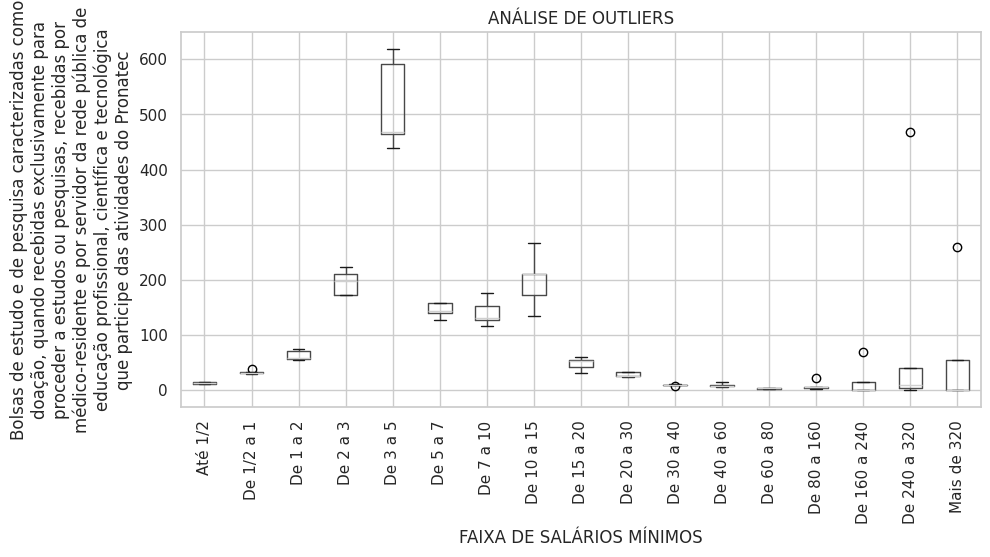

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Bolsas de estudo e de pesquisa caracterizadas como doação, quando recebidas exclusivamente para proceder a estudos ou pesquisas, recebidas por médico-residente e por servidor da rede pública de educação profissional, científica e tecnológica que participe das atividades do Pronatec',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

label_y = 'Bolsas de estudo e de pesquisa caracterizadas como doação, quando recebidas exclusivamente para proceder a estudos ou pesquisas, recebidas por médico-residente e por servidor da rede pública de educação profissional, científica e tecnológica que participe das atividades do Pronatec'
wrapped_label = textwrap.fill(label_y, width=50)
plt.ylabel(wrapped_label)

plt.show()

Neste caso as bolsas de estudo são recebidas por médicos e servidores públicos, os quais possuem rendas maiores. Além da faixa de classe média de 3 a 5 salários, chama a atenção que temos pessoas com rendas superiores a 240 salários e que também receberam bolsas do PRONATEC, um programa do governo para fomentar a educação e inclusão social.

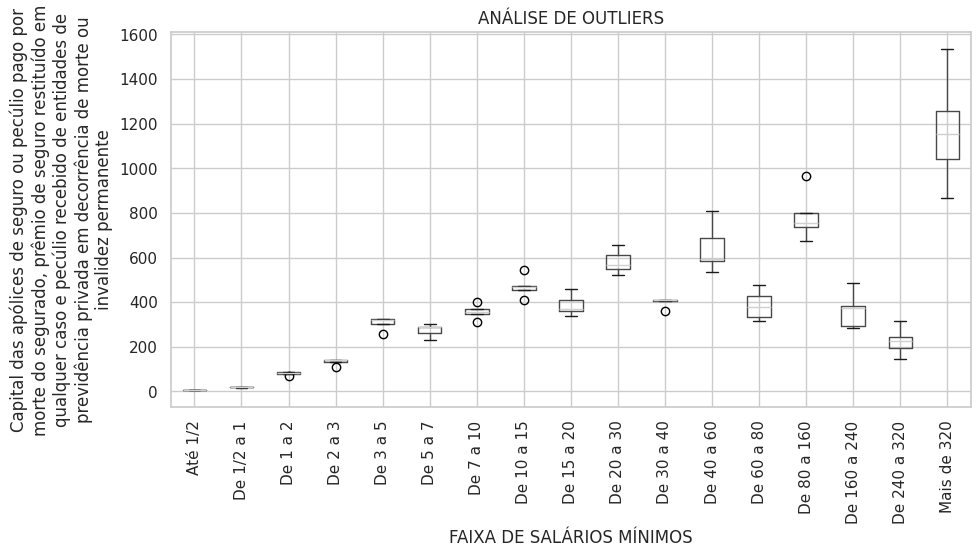

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

label_y = 'Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente'
wrapped_label = textwrap.fill(label_y, width=50)
plt.ylabel(wrapped_label)

plt.show()

Vemos que com o aumento da faixa salarial temos uma restituição de prêmio de seguro de vida também crescente. É de se esperar, pela disponibilidade financeira em investir em seguros, porém chama a atenção a queda na faixa de 160 a 320 salários, com restituições equivalente à classe média (3 a 5 salários).

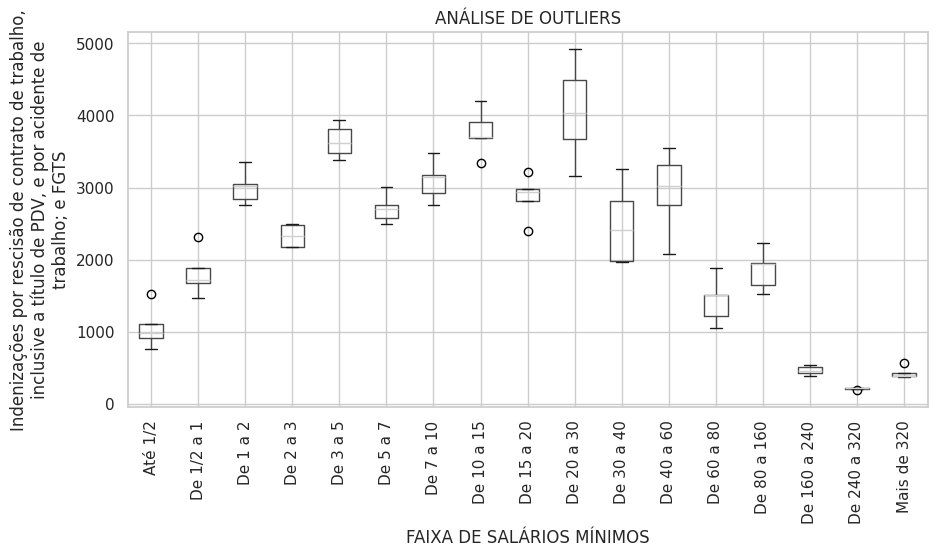

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

label_y = 'Indenizações por rescisão de contrato de trabalho, inclusive a título de PDV, e por acidente de trabalho; e FGTS'
wrapped_label = textwrap.fill(label_y, width=50)
plt.ylabel(wrapped_label)

plt.show()

Aqui temos uma rescisão de contratos de trabalho proporcional a renda salarial até a faixa de 30 salários mínimos. A partir disso, temos uma decrescente, onde provavelmente estas faixas salariais não recebem salários com contrato de trabalho.

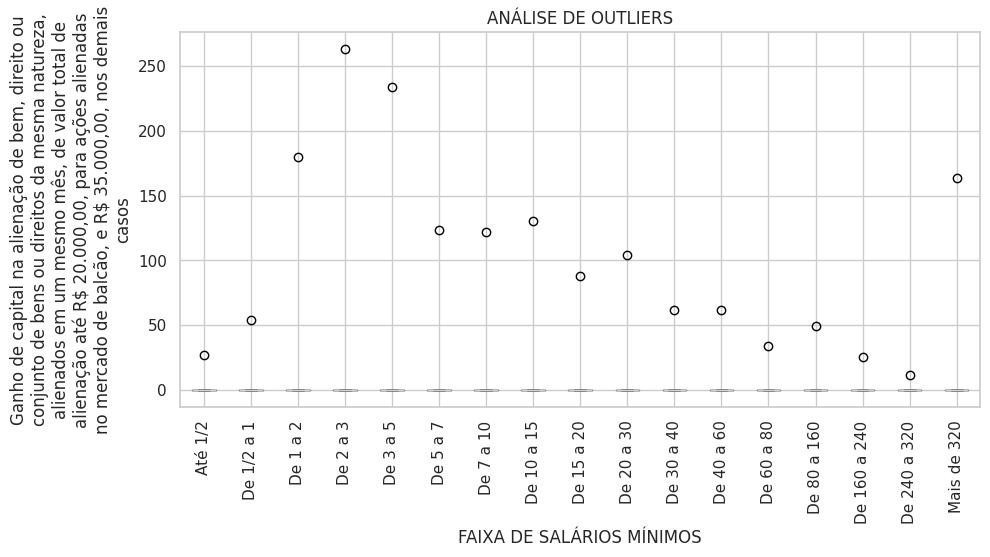

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Ganho de capital na alienação de bem, direito ou conjunto de bens ou direitos da mesma natureza, alienados em um mesmo mês, de valor total de alienação até R$ 20.000,00, para ações alienadas no mercado de balcão, e R$ 35.000,00, nos demais casos',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

label_y = 'Ganho de capital na alienação de bem, direito ou conjunto de bens ou direitos da mesma natureza, alienados em um mesmo mês, de valor total de alienação até R$ 20.000,00, para ações alienadas no mercado de balcão, e R$ 35.000,00, nos demais casos'
wrapped_label = textwrap.fill(label_y, width=50)
plt.ylabel(wrapped_label)

plt.show()


**SEM ANÁLISE ESPECÍFICA**

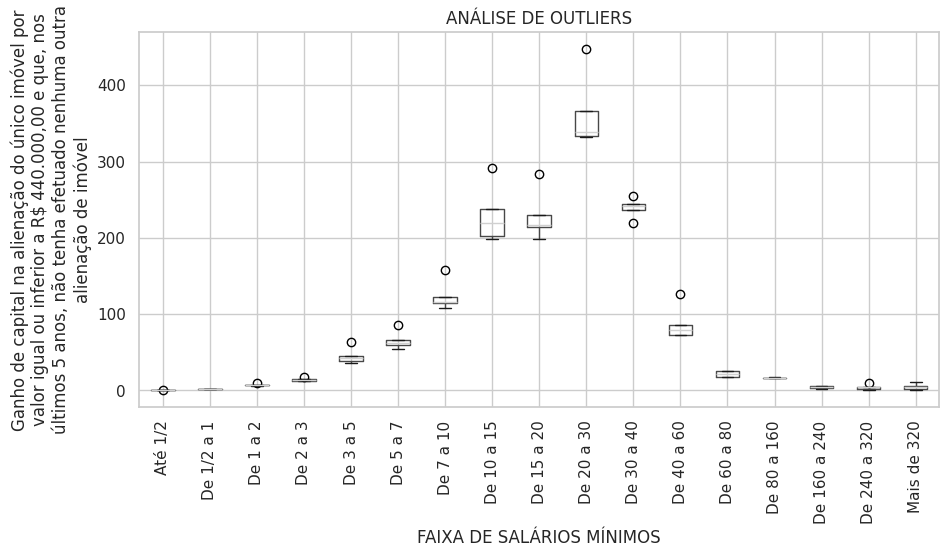

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada

ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Ganho de capital na alienação do único imóvel por valor igual ou inferior a R$ 440.000,00 e que, nos últimos 5 anos, não tenha efetuado nenhuma outra alienação de imóvel',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

label_y = 'Ganho de capital na alienação do único imóvel por valor igual ou inferior a R$ 440.000,00 e que, nos últimos 5 anos, não tenha efetuado nenhuma outra alienação de imóvel'
wrapped_label = textwrap.fill(label_y, width=50)
plt.ylabel(wrapped_label)

plt.show()

Aqui temos a venda do único imóvel até R$  440.000,00. neste caso os valores se concentram na faixa de 7 a 60 salários mínimos. Dentro do esperado.

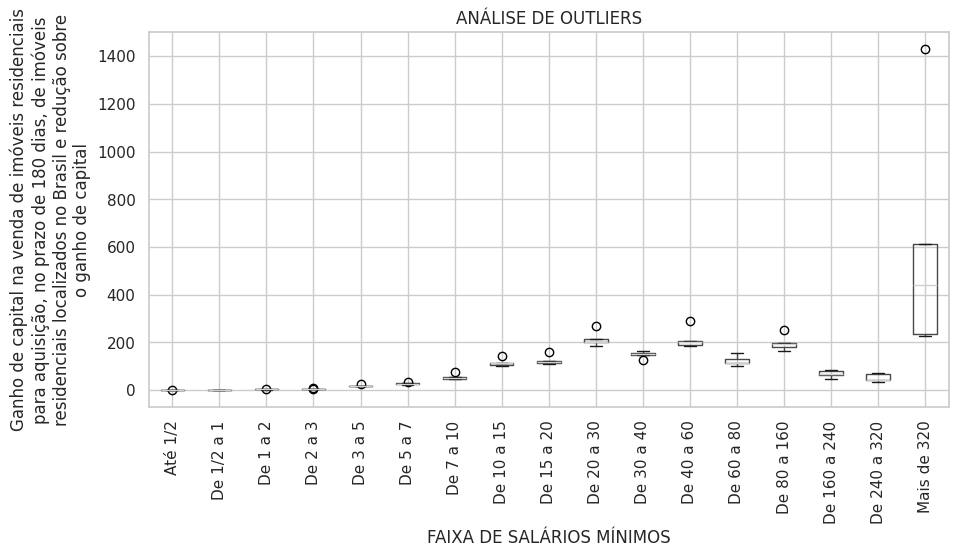

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Ganho de capital na venda de imóveis residenciais para aquisição, no prazo de 180 dias, de imóveis residenciais localizados no Brasil e redução sobre o ganho de capital',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

label_y = 'Ganho de capital na venda de imóveis residenciais para aquisição, no prazo de 180 dias, de imóveis residenciais localizados no Brasil e redução sobre o ganho de capital'
wrapped_label = textwrap.fill(label_y, width=50)
plt.ylabel(wrapped_label)

plt.show()

Este é o caso de venda de imóvel para aquisição de um outro em no máximo 6 meses. Temos um incremento com as faixas salariais, mais um pico muito grande na faixa de mais de 320 salários.

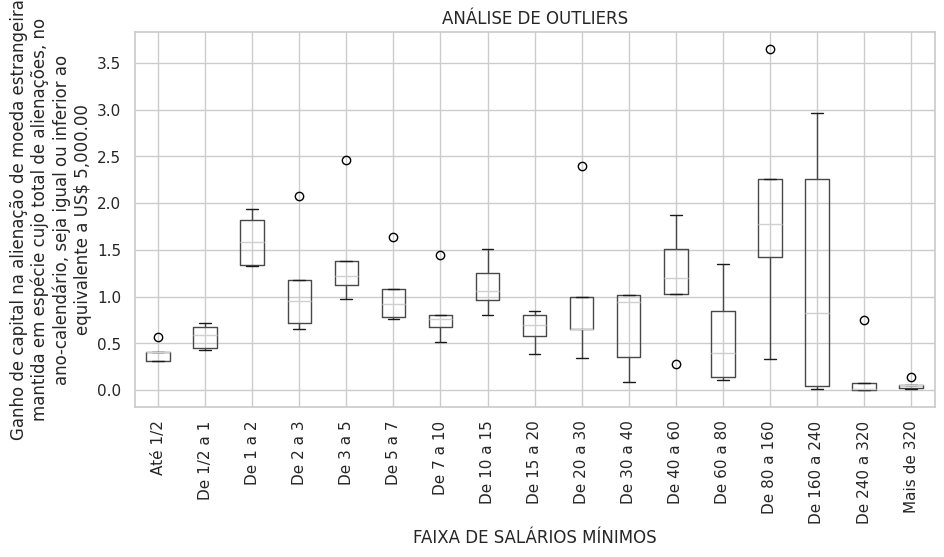

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Ganho de capital na alienação de moeda estrangeira mantida em espécie cujo total de alienações, no ano-calendário, seja igual ou inferior ao equivalente a US$ 5,000.00',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

label_y = 'Ganho de capital na alienação de moeda estrangeira mantida em espécie cujo total de alienações, no ano-calendário, seja igual ou inferior ao equivalente a US$ 5,000.00'
wrapped_label = textwrap.fill(label_y, width=50)
plt.ylabel(wrapped_label)

plt.show()

O uqe chama a atenção aqui é a venda de moeda estrangeira expressiva na faixa salarial de 1 a 2 salários mínimos.

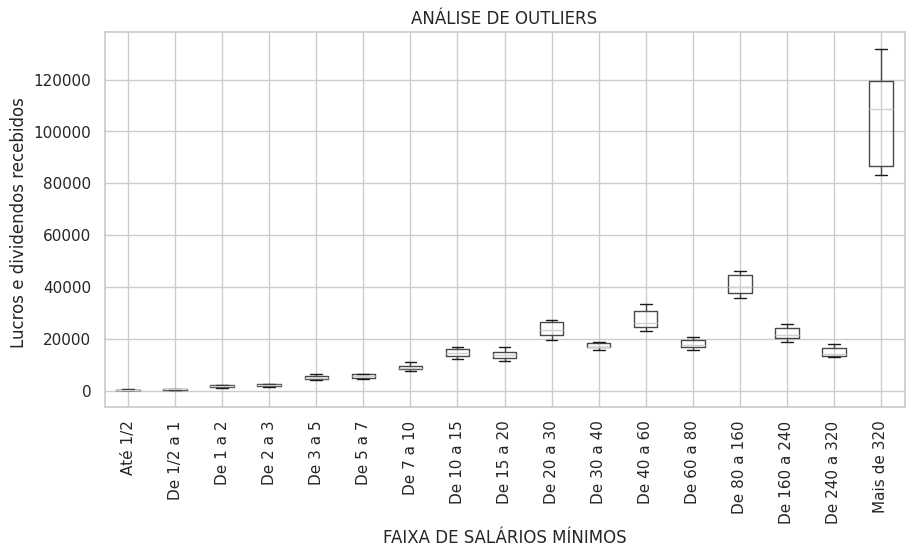

In [ ]:
# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
ordem=['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
       'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
       'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
       'De 160 a 240', 'De 240 a 320', 'Mais de 320']

receita.loc[:, 'Faixa de Salários-Mínimos'] = pd.Categorical(receita.loc[:, 'Faixa de Salários-Mínimos'], categories=ordem, ordered=True)
ax = receita.boxplot(column='Lucros e dividendos recebidos',figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
ax.set_xticklabels(wrapped_labels, rotation=90)

plt.ylabel('Lucros e dividendos recebidos ')

plt.show()

Os lucros e dividendos cresce conforme a faixa salarial, o que é esperado, mas vemos um valor muito superior na faixa de mais de 320 salários, mostrando a fonte de renda principal dessa faixa.

**'Parcela isenta de proventos de aposentadoria, reserva remunerada, reforma e pensão de declarante com 65 anos ou mais'**

In [ ]:
dado = 'Parcela isenta de proventos de aposentadoria, reserva remunerada, reforma e pensão de declarante com 65 anos ou mais'

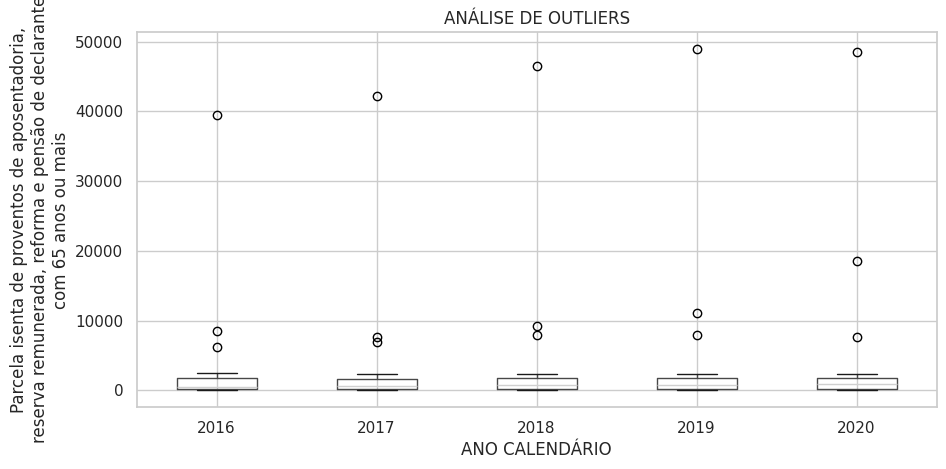

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

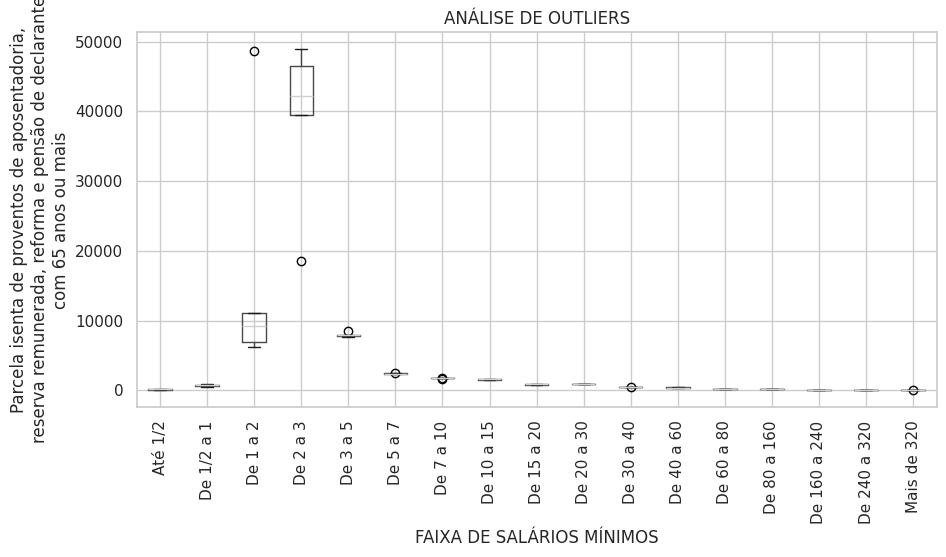

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Em futuras análises, será necessário expurgar esses outliers.

**Pensão, proventos de aposentadoria ou reforma por moléstia grave ou aposentadoria ou reforma por acidente  em serviço**

In [ ]:
dado = 'Pensão, proventos de aposentadoria ou reforma por moléstia grave ou aposentadoria ou reforma por acidente  em serviço'

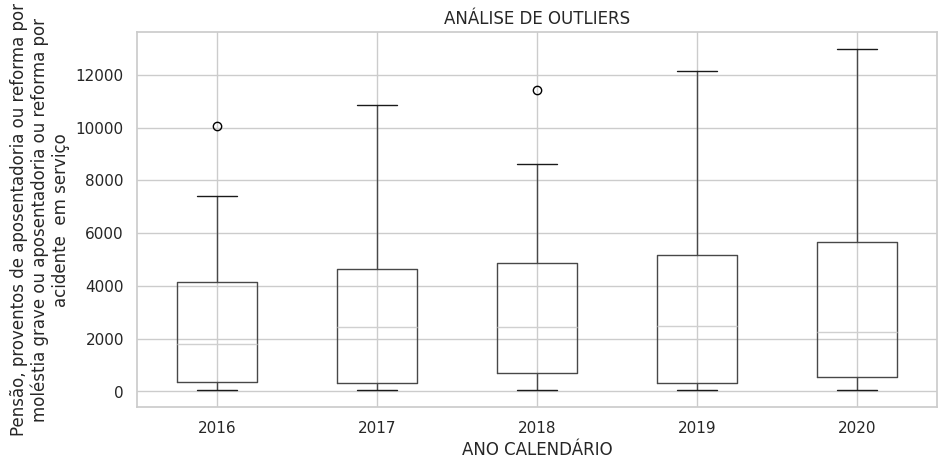

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

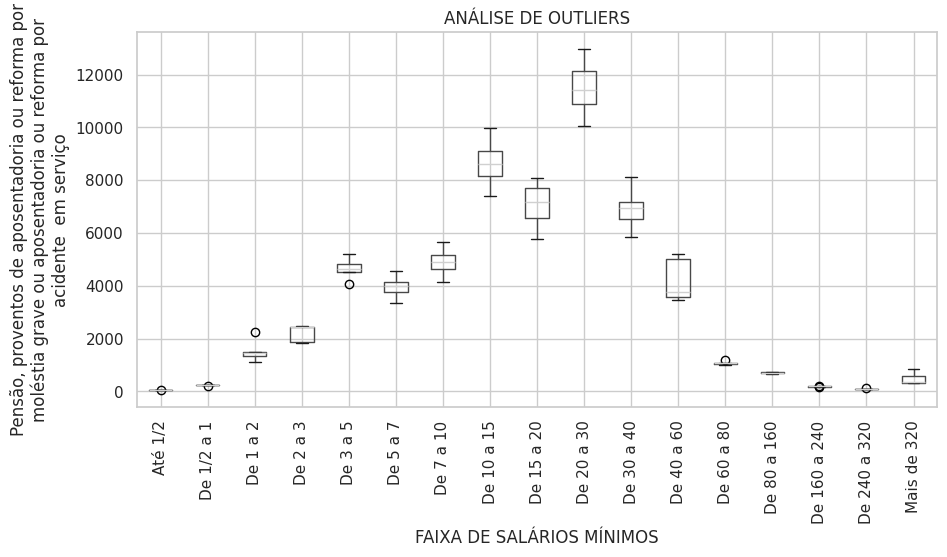

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Sem outliers significativos.

**Rendimentos de cadernetas de poupança, letras hipotecárias, letras de crédito do agronegócio e imobiliário (LCA e LCI) e certificados de recebíveis do agronegócio e imobiliários (CRA e CRI)**

In [ ]:
dado = 'Rendimentos de cadernetas de poupança, letras hipotecárias, letras de crédito do agronegócio e imobiliário (LCA e LCI) e certificados de recebíveis do agronegócio e imobiliários (CRA e CRI)'

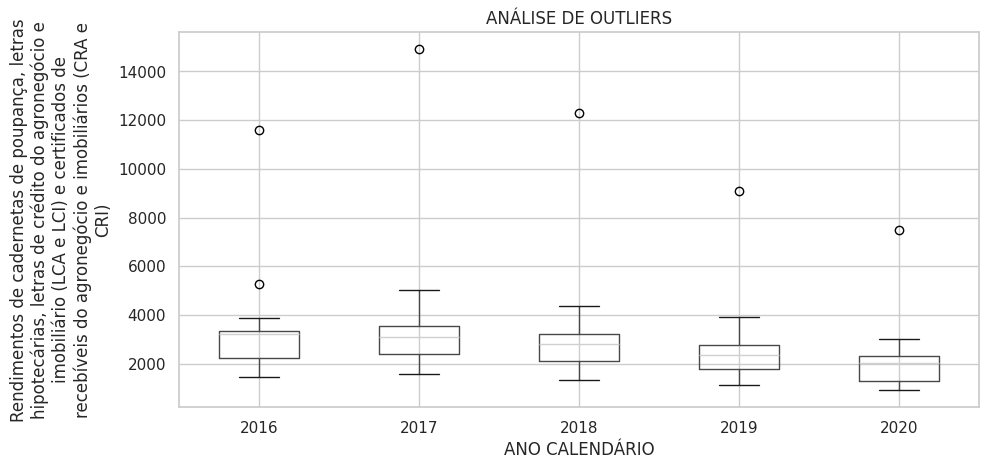

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

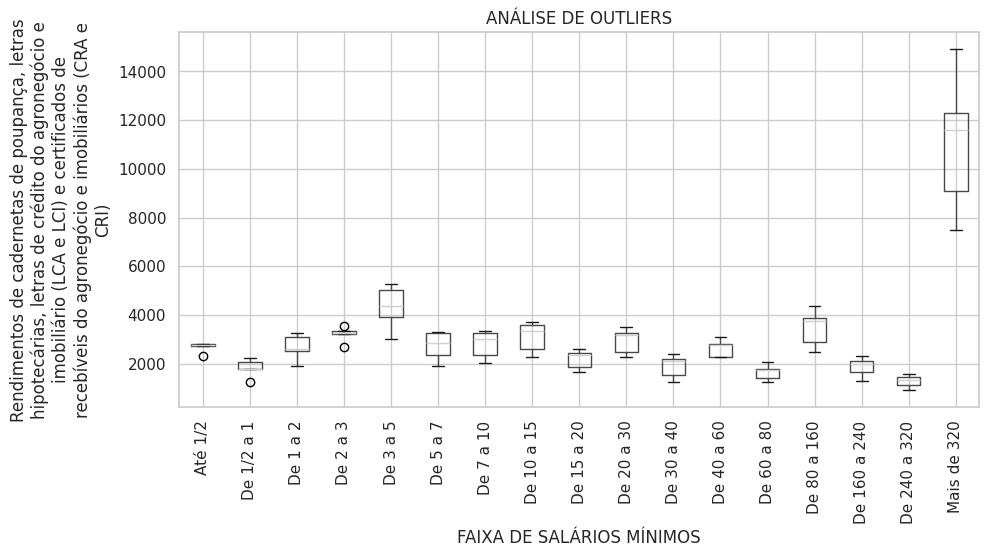

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Sem outliers significativos.

**Rendimento de sócio ou titular de microempresa ou empresa de pequeno porte optante pelo Simples Nacional, exceto pro labore, aluguéis e serviços prestados**

In [ ]:
dado = 'Rendimento de sócio ou titular de microempresa ou empresa de pequeno porte optante pelo Simples Nacional, exceto pro labore, aluguéis e serviços prestados'

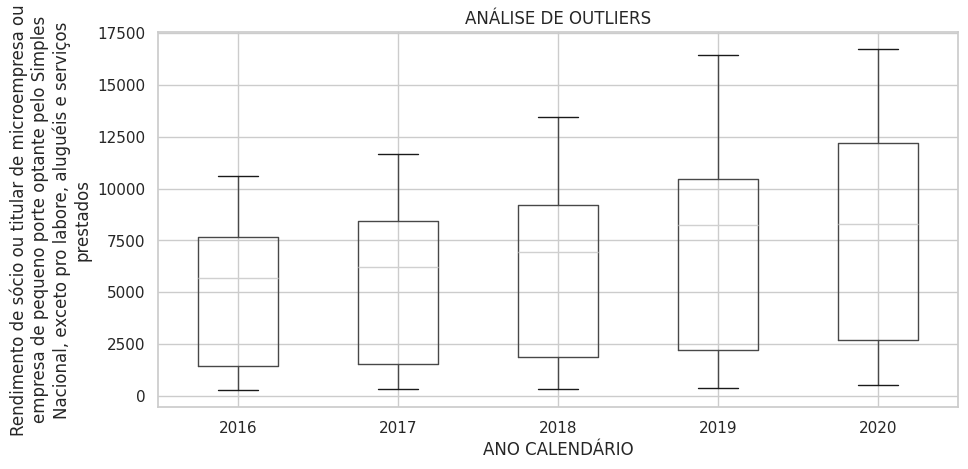

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

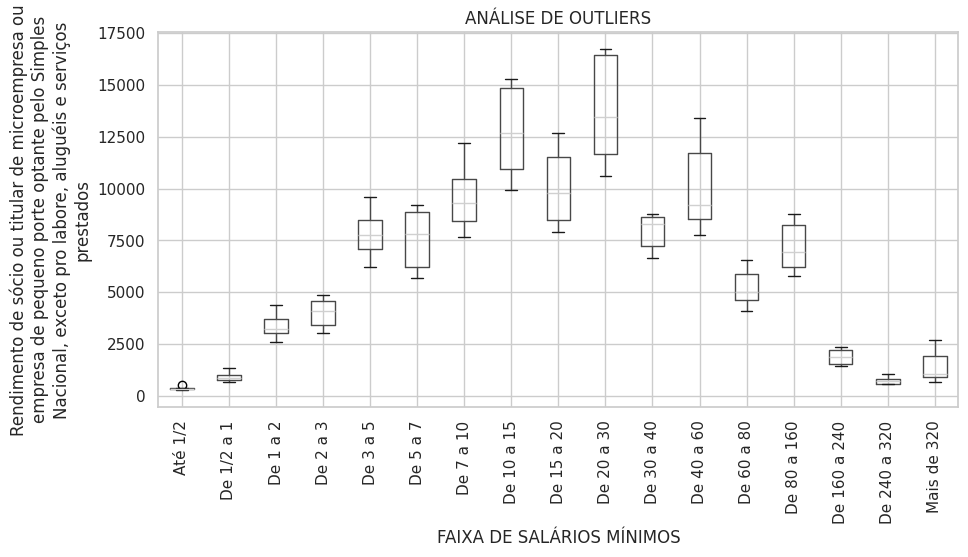

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Sem outliers significativos.

**Transferências patrimoniais - doações e heranças**

In [ ]:
dado = 'Transferências patrimoniais - doações e heranças'

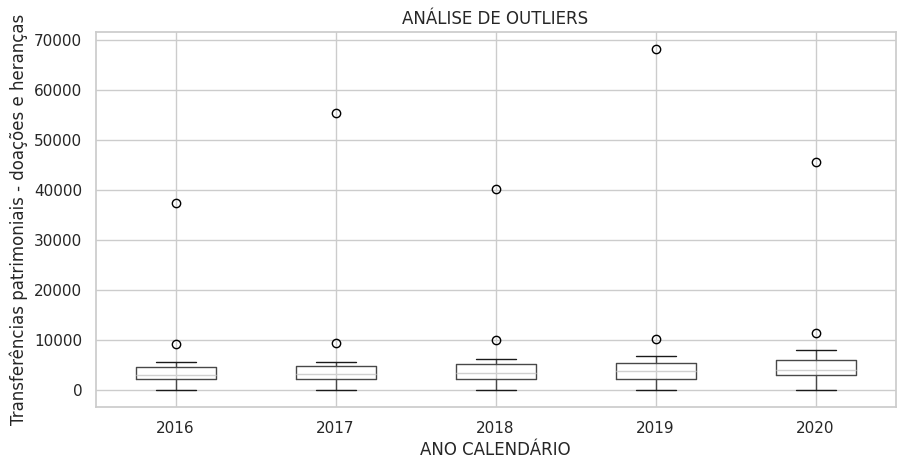

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

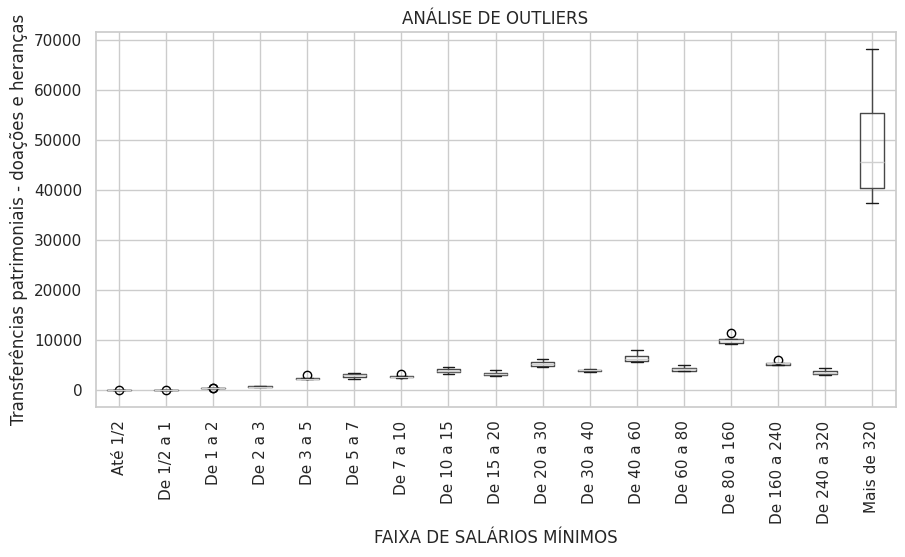

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Sem outliers significativos.

**Imposto sobre a renda de anos-calendário anteriores compensado judicialmente neste ano-calendário**

In [ ]:
dado = 'Imposto sobre a renda de anos-calendário anteriores compensado judicialmente neste ano-calendário'

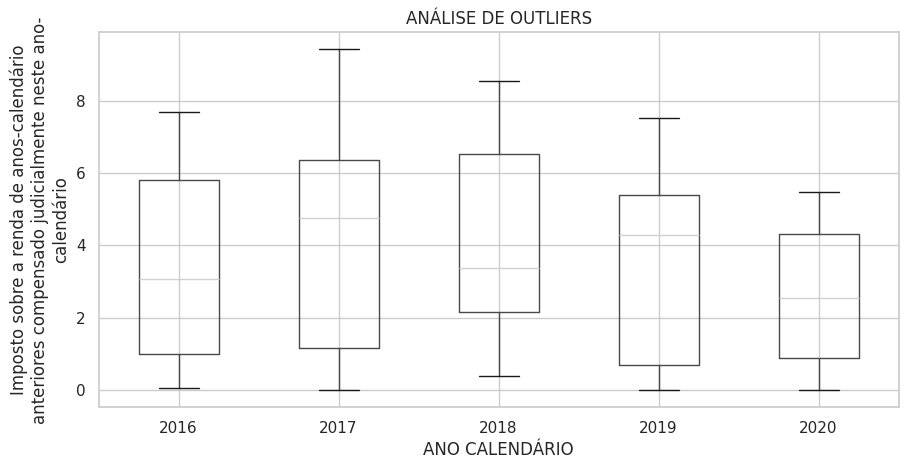

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

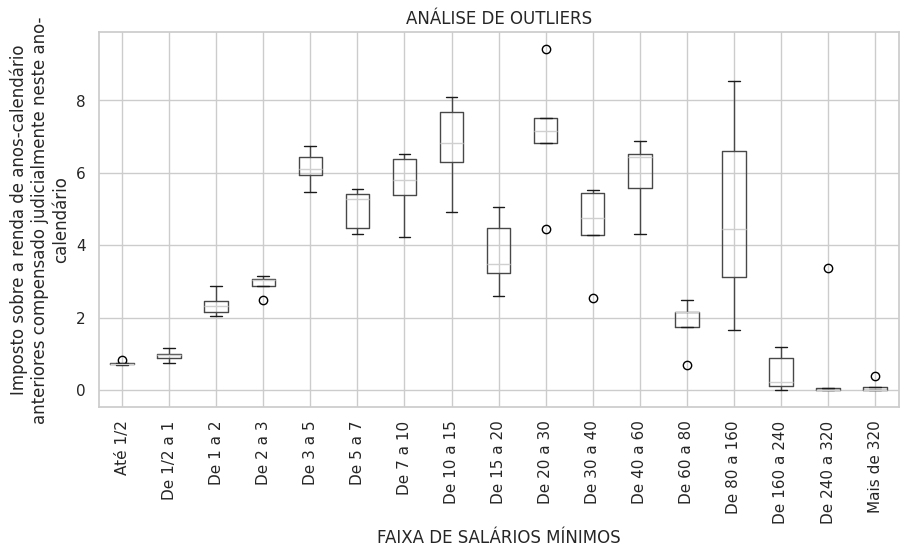

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Sem observação a ser feita.

**75% (setenta e cinco por cento) dos rendimentos do trabalho assalariado recebidos em moeda estrangeira por servidores de autarquias ou repartições do Governo Brasileiro situadas no exterior, convertidos em reais**

In [ ]:
dado = '75% (setenta e cinco por cento) dos rendimentos do trabalho assalariado recebidos em moeda estrangeira por servidores de autarquias ou repartições do Governo Brasileiro situadas no exterior, convertidos em reais'

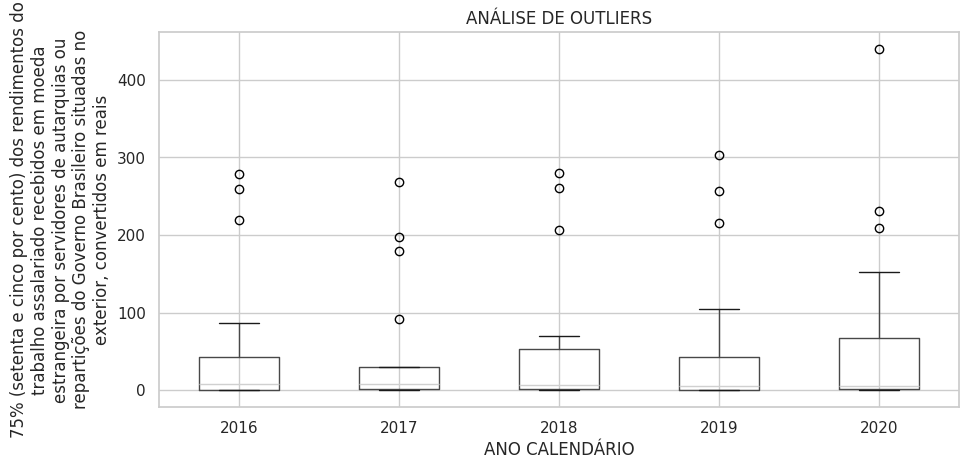

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

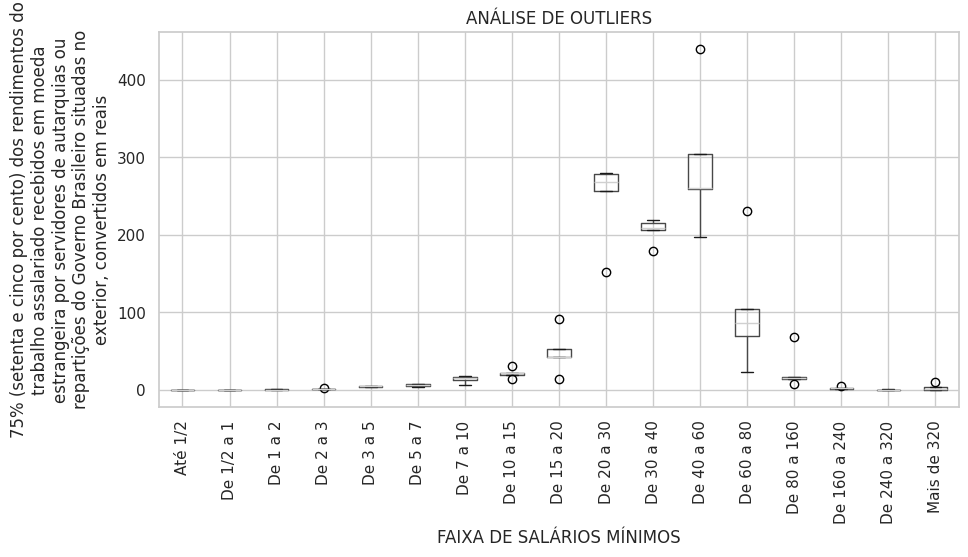

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Esses outliers podem ser em decorrência da variação cambial durante o ano. Sendo importante considerá-los em futuras análises.

**Incorporação de reservas ao capital / Bonificações em ações**

In [ ]:
dado = 'Incorporação de reservas ao capital / Bonificações em ações'

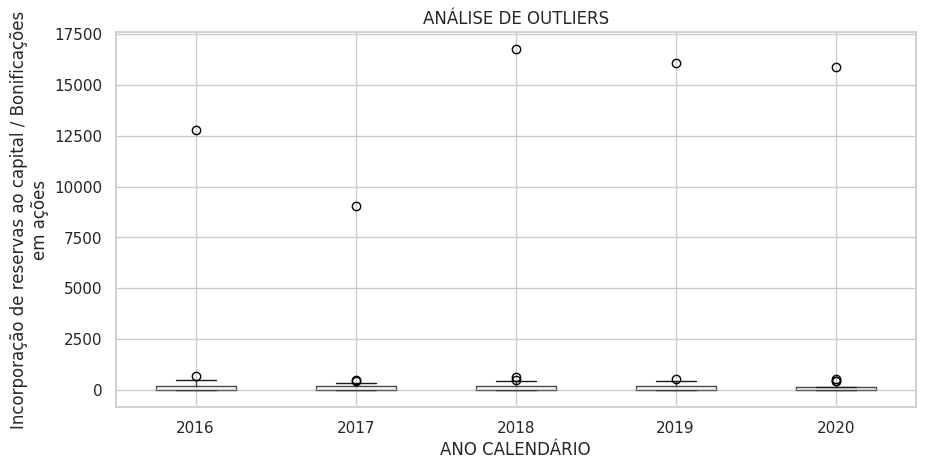

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

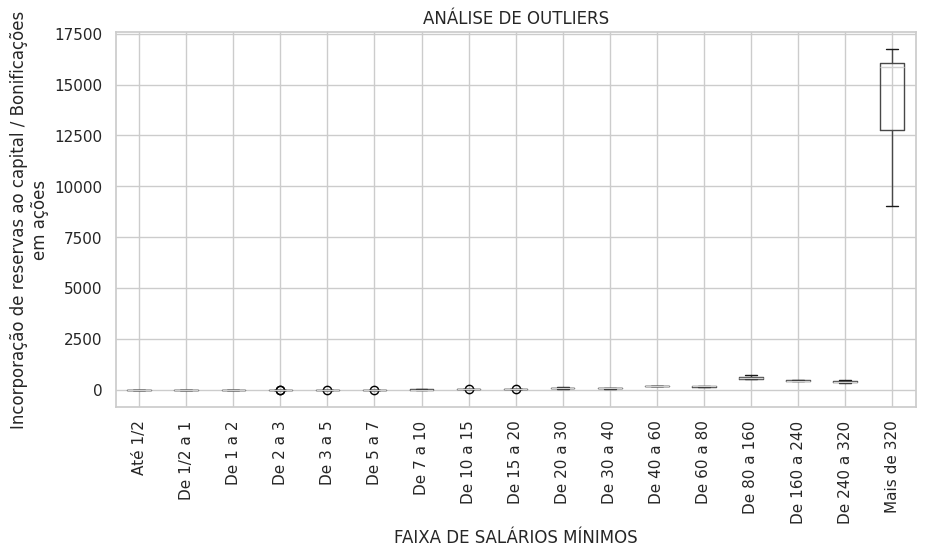

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Não há outlier significativo.

**Transferências patrimoniais - meação e dissolução da sociedade conjugal e da unidade familiar**

In [ ]:
dado = 'Transferências patrimoniais - meação e dissolução da sociedade conjugal e da unidade familiar'

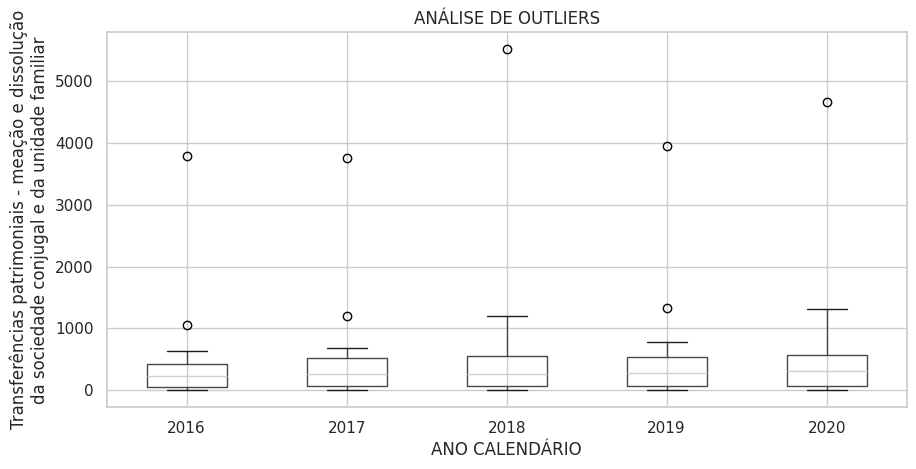

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

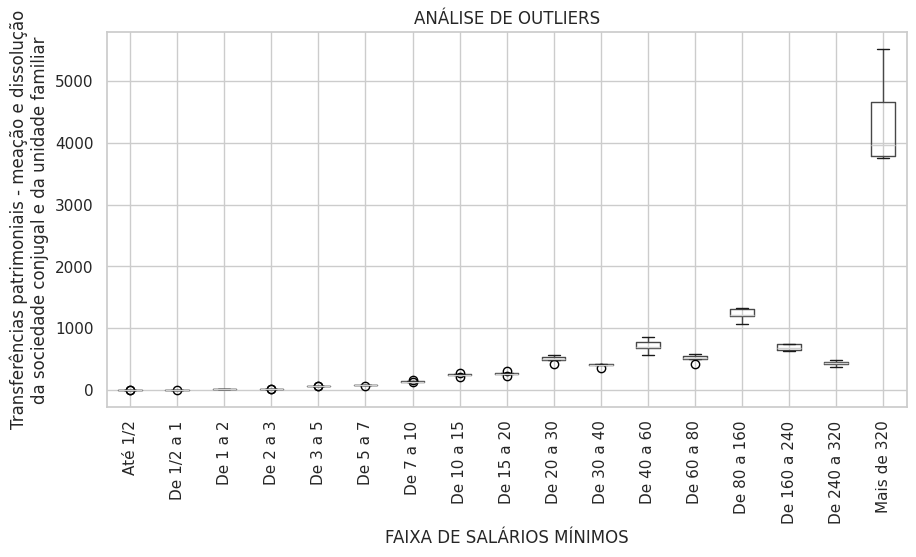

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Não há outlier significativo.

**Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações**

In [ ]:
dado = 'Ganhos líquidos em operações no mercado à vista de ações negociadas em bolsas de valores nas alienações realizadas até R$ 20.000,00 em cada mês, para o conjunto de ações'

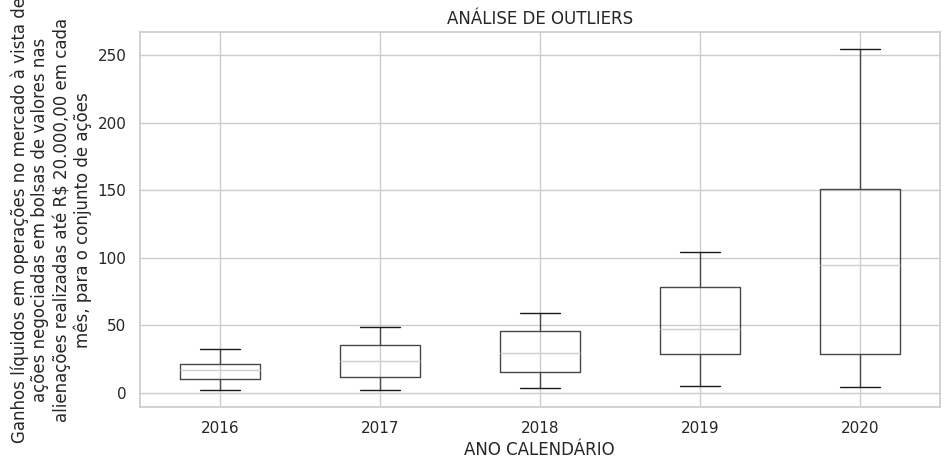

In [ ]:
receita.boxplot(column=dado,figsize=(10,5) ,by='Ano Calendário')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("ANO CALENDÁRIO")

# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

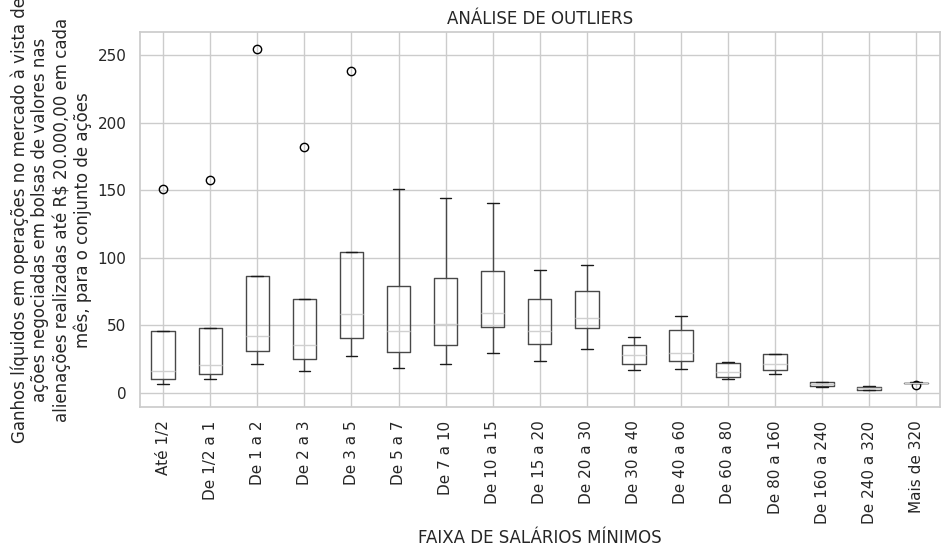

In [ ]:
ax = receita.boxplot(column=dado,figsize=(10,5) ,by='Faixa de Salários-Mínimos')
plt.suptitle('')
plt.title("ANÁLISE DE OUTLIERS")
plt.xlabel("FAIXA DE SALÁRIOS MÍNIMOS")

# Quebrar o texto do eixo X usando textwrap
labels = [label.get_text() for label in ax.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]  # Ajuste o width conforme necessário

# Definir os rótulos quebrados no eixo X
ax.set_xticklabels(wrapped_labels, rotation=90)


# Quebrar o texto do eixo Y usando textwrap
label_y = dado
wrapped_label = textwrap.fill(label_y, width=50)  # Ajuste o width conforme necessário

# Colocar o rótulo do eixo Y
plt.ylabel(wrapped_label)
plt.show()

Esses outliers, até 5 salários, devem corresponder a uma parcela da população que trabalha na informalidade, não declarando explicitamente seus ganhos mensais. Sendo importante considerá-los em futuras análises.

In [ ]:
# Reduzindo os nomes das demais colunas
data = receita.copy()
for i, column in enumerate(receita.columns[-9:], start=1):
        data = data.rename(columns={column: f'col{i}'})

data.columns[-9:]

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9'], dtype='object')

* **col1** - Ganhos líquidos em operações com ouro, ativo financeiro, nas alienações realizadas até R$ 20.000,00 em cada mês

Se você vender ouro e o total das vendas não ultrapassar R$ 20.000,00 no mês, o lucro obtido nessas operações será isento de imposto de renda(compra - venda).

* **col2** - Rendimento bruto, até o máximo de 90%, da prestação de serviços decorrente do transporte de carga e com trator, máquina de terraplenagem, colheitadeira e assemelhados.

Cobrança de imposto apenas de 10% do rendimento bruto(sem desconto de gasolina, manutenção,etc) recebidos sobre serviços de transporte de carga e com trator, maquina de terraplanagem, colheitadeira e assemelhados.

* **col3** - Rendimento bruto, até o máximo de 40%, da prestação de serviços decorrente do transporte de passageiros.

Cobrança de imposto sobre 60% do rendimento bruto recebido pelo serviço  de transporte de passageiros.

* **col4** - Restituição de imposto sobre a renda de anos-calendário anteriores

Ser restituído por causa de pagamentos indevidos(mais imposto do que deveria) em anos anteriores devido a declarações não informadas, etc.

* **col5** - Outros

* **col6** - Parcela isenta correspondente à atividade rural

isenção de impostos sobre parcela da renda gerada por atividades rurais, como a agricultura, pecuária ou outros empreendimentos agrícolas.

* **col7** - Recuperação de prejuízos em Renda Variável (bolsa de valores, de mercadorias, de futuros e assemelhados e fundos de investimento imobiliário)

Se um investidor de rendas variável(investimentos que podem variar ao longo do tempo como ações, commodities, FIIS, outros ativos financeiros negociados na bolsa de valores)tiver algum prejuízo num ano, ele pode abater esse prejuízo em possíveis ganhos futuros(EX: Se no ano de 2024, um investidor teve 10.000,00 reais de prejuízo em ações, e no ano de 2025 obteve 15.000,00 reais de ganho com ações, ele poderá utilizar os 10.000,00 reais de prejuízo para abater da base de cálculo do Imposto de Renda sobre os 15.000,00 reais de ganho.
O imposto seria calculado sobre 5.000,00 reais(15.000,00 reais -10.000,00 reais) ao invés de sobre os 15.000,00 reais.)

* **col8** - Demais Rendimentos isentos e não-tributáveis dos dependentes

Quando um contribuinte declara seus rendimentos no Imposto de Renda, ele pode incluir dependentes, como filhos, cônjuges, pais ou outros familiares que dependem dele financeiramente. Os rendimentos isentos(Receita Federal não cobra Imposto de Renda sobre esse tipo de rendimento como Rendimentos de contas de poupança, Seguro de vida, aposentadoria/pensão) ou não-tributáveis(não são tributados pelo Imposto de Renda, mas a isenção não é absoluta (não se trata de uma isenção formal como no caso dos rendimentos isentos) como indenizações, reembolsos de despesas) recebidos pelos dependentes não afetam o cálculo do imposto do contribuinte principal. EX: se um dependente recebeu rendimento isento de uma herança ou um reembolso de despesas por meio de um seguro de saúde, esses valores não serão somados à renda do contribuinte principal para cálculo de impostos.


EX:

Rendimentos isentos de um dependente: Imagine que um dependente, como um filho, tenha recebido um valor de aposentadoria que é isento de Imposto de Renda. Esse valor, embora seja uma fonte de renda para o dependente, não precisa ser declarado pelo contribuinte principal, já que é isento de tributação.

Rendimentos não-tributáveis de um dependente: Um dependente recebe uma indenização por um acidente. Esse valor é não-tributável, o que significa que não será somado à renda do contribuinte na hora de calcular os impostos, e também não será tributado diretamente pelo dependente.

* **col9** - Benefícios individuais e reembolso de despesas recebidos voluntariamente da FIFA, da Subsidiária FIFA Brasil ou Comitê Organizador Brasileiro (LOC)

Este item se refere a benefícios ou reembolsos que foram pagos a indivíduos pela FIFA, pela Subsidiária FIFA Brasil ou pelo Comitê Organizador Brasileiro, relacionados a eventos como a Copa do Mundo. Esses valores são considerados isentos de tributação, ou seja, não precisam ser incluídos na base de cálculo do Imposto de Renda do beneficiário. Isso pode abranger, por exemplo, ajuda de custo, reembolsos de despesas ou bônus recebidos por pessoas envolvidas nos eventos organizados pela FIFA no Brasil

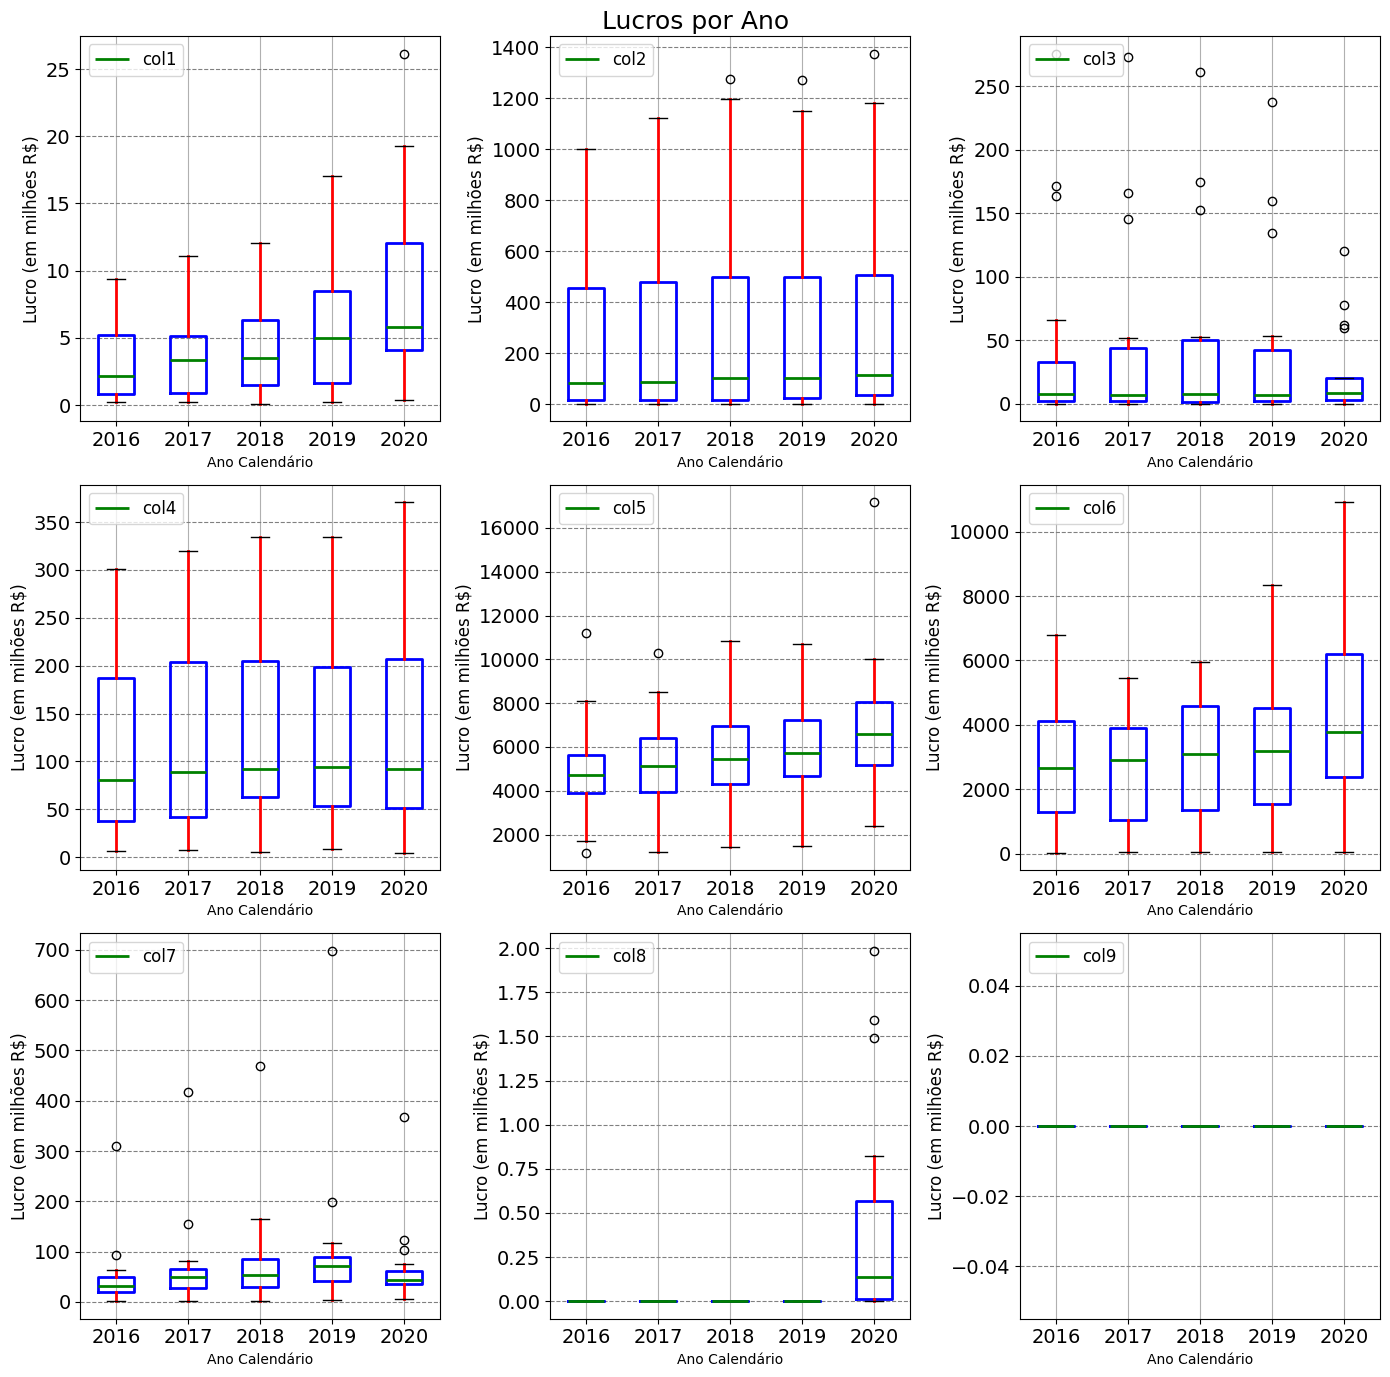

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(14,14))

cols = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9']

for i, col_data in enumerate(cols):
    lin = i//3
    col = i%3

    data.boxplot(column=col_data, by='Ano Calendário', grid=True,ax=ax[lin,col], label=col_data,
             boxprops=dict(color='blue', linewidth=2),
             whiskerprops=dict(color='red', linewidth=2),
             medianprops=dict(color='green', linewidth=2))

    ax[lin,col].set_ylabel('Lucro (em milhões R$)', fontsize=12)
    ax[lin,col].grid(axis='y', linestyle='--', color='gray', alpha=1)
    ax[lin,col].legend(title='', loc='upper left',fontsize=12)
    ax[lin, col].set_title('')
    ax[lin,col].tick_params(axis='y', labelsize=14)
    ax[lin,col].tick_params(axis='x', labelsize=14)



plt.suptitle('Lucros por Ano', fontsize=18)
plt.tight_layout()

plt.show()

* col 1 - O outlier mostrado é referente à faixa salarial de "15 a 20" em 2020, justamente o de maior valor no somatório, então **se aplica**.
* col 2 - Os outliers mostrados são referentes à faixa salarial de "10 a 15" em 2018, 2019 e 2020, justamente os de maiores valores somados, então **se aplica**.
* col 3 - Os outliers mostrados são referentes às faixas salariais de "1/2 a 1", "1 a 2" , "2 a 3" e "3 a 5", justamente os de maiores valores, **então se aplica**.
* col 4 - **Não possui outliers**.
* col 5 - Coluna referente à 'Outros', logo **impossibilita análise**.
* col 6 - **Não possui outliers**.
* col 7 - Os outliers mostrados são referentes às faixas salariais de "40 a 60", "80 a 160" , "160 a 240" e "Mais de 320", justamente os de maiores valores, então **se aplica**.
* col 8 - Temos dados apenas de 2020. Os outliers mostrados são referentes às faixas salariais de "40 a 60", "80 a 160" e "240 a 320", justamente os de maiores valores, então **se aplica**.
* col 9 - Não apresenta dados, logo **impossibilita análise**.

# 5 - Visualizações

## Insight 1

<ipython-input-55-c8ac7a29e1a1>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_capital = receita.groupby('Faixa de Salários-Mínimos')['Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente'].mean()
<ipython-input-55-c8ac7a29e1a1>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(wrapped_labels)


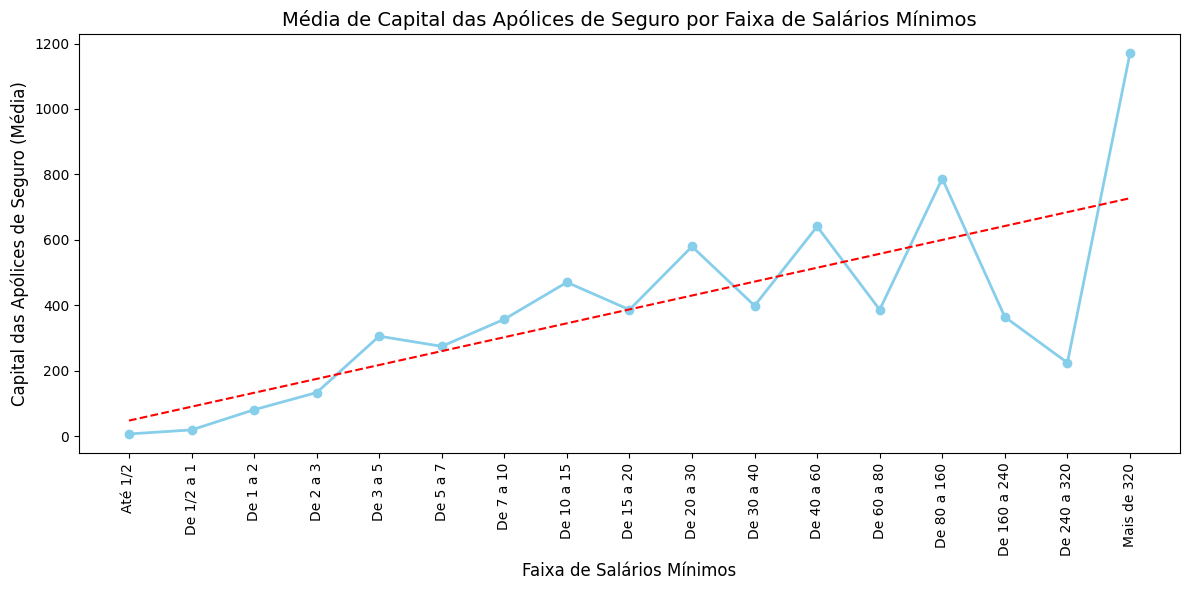

In [ ]:
# Definindo a ordem das faixas de salários
ordem = ['Até 1/2', 'De 1/2 a 1', 'De 1 a 2', 'De 2 a 3', 'De 3 a 5',
         'De 5 a 7', 'De 7 a 10', 'De 10 a 15', 'De 15 a 20', 'De 20 a 30',
         'De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160',
         'De 160 a 240', 'De 240 a 320', 'Mais de 320']

# Garantir que a coluna 'Faixa de Salários-Mínimos' seja categórica e ordenada
receita['Faixa de Salários-Mínimos'] = pd.Categorical(receita['Faixa de Salários-Mínimos'], categories=ordem, ordered=True)

# Agrupando os dados pela 'Faixa de Salários-Mínimos' e calculando a média para a coluna de interesse
media_capital = receita.groupby('Faixa de Salários-Mínimos')['Capital das apólices de seguro ou pecúlio pago por morte do segurado, prêmio de seguro restituído em qualquer caso e pecúlio recebido de entidades de previdência privada em decorrência de morte ou invalidez permanente'].mean()

# Plotando o gráfico de linha
plt.figure(figsize=(12, 6))

plt.plot(media_capital.index, media_capital.values, marker='o', color='skyblue', linestyle='-', linewidth=2)

# Ajustando uma linha de tendência (polinômio de grau 1 - reta)
faixas_num = np.arange(len(media_capital))
coef = np.polyfit(faixas_num, media_capital.values, 1)  # Ajuste linear
linha_tendencia = np.poly1d(coef)  # Função polinomial a partir dos coeficientes

# Plotando a linha de tendência
plt.plot(media_capital.index, linha_tendencia(faixas_num), color='red', linestyle='--', label='Linha de Tendência')

# Adicionando título e rótulos
plt.title('Média de Capital das Apólices de Seguro por Faixa de Salários Mínimos', fontsize=14)
plt.xlabel('Faixa de Salários Mínimos', fontsize=12)
plt.ylabel('Capital das Apólices de Seguro (Média)', fontsize=12)

# Quebrando o texto do eixo X usando textwrap para melhor visualização
labels = [label.get_text() for label in plt.gca().get_xticklabels()]
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]
plt.xticks(rotation=90)
plt.gca().set_xticklabels(wrapped_labels)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Vemos que com o aumento da faixa salarial temos uma restituição de prêmio de seguro de vida também crescente. É de se esperar, pela disponibilidade financeira em investir em seguros, porém chama a atenção a queda na faixa de 160 a 320 salários, com restituições equivalente à classe média (3 a 5 salários).

## Insight 2

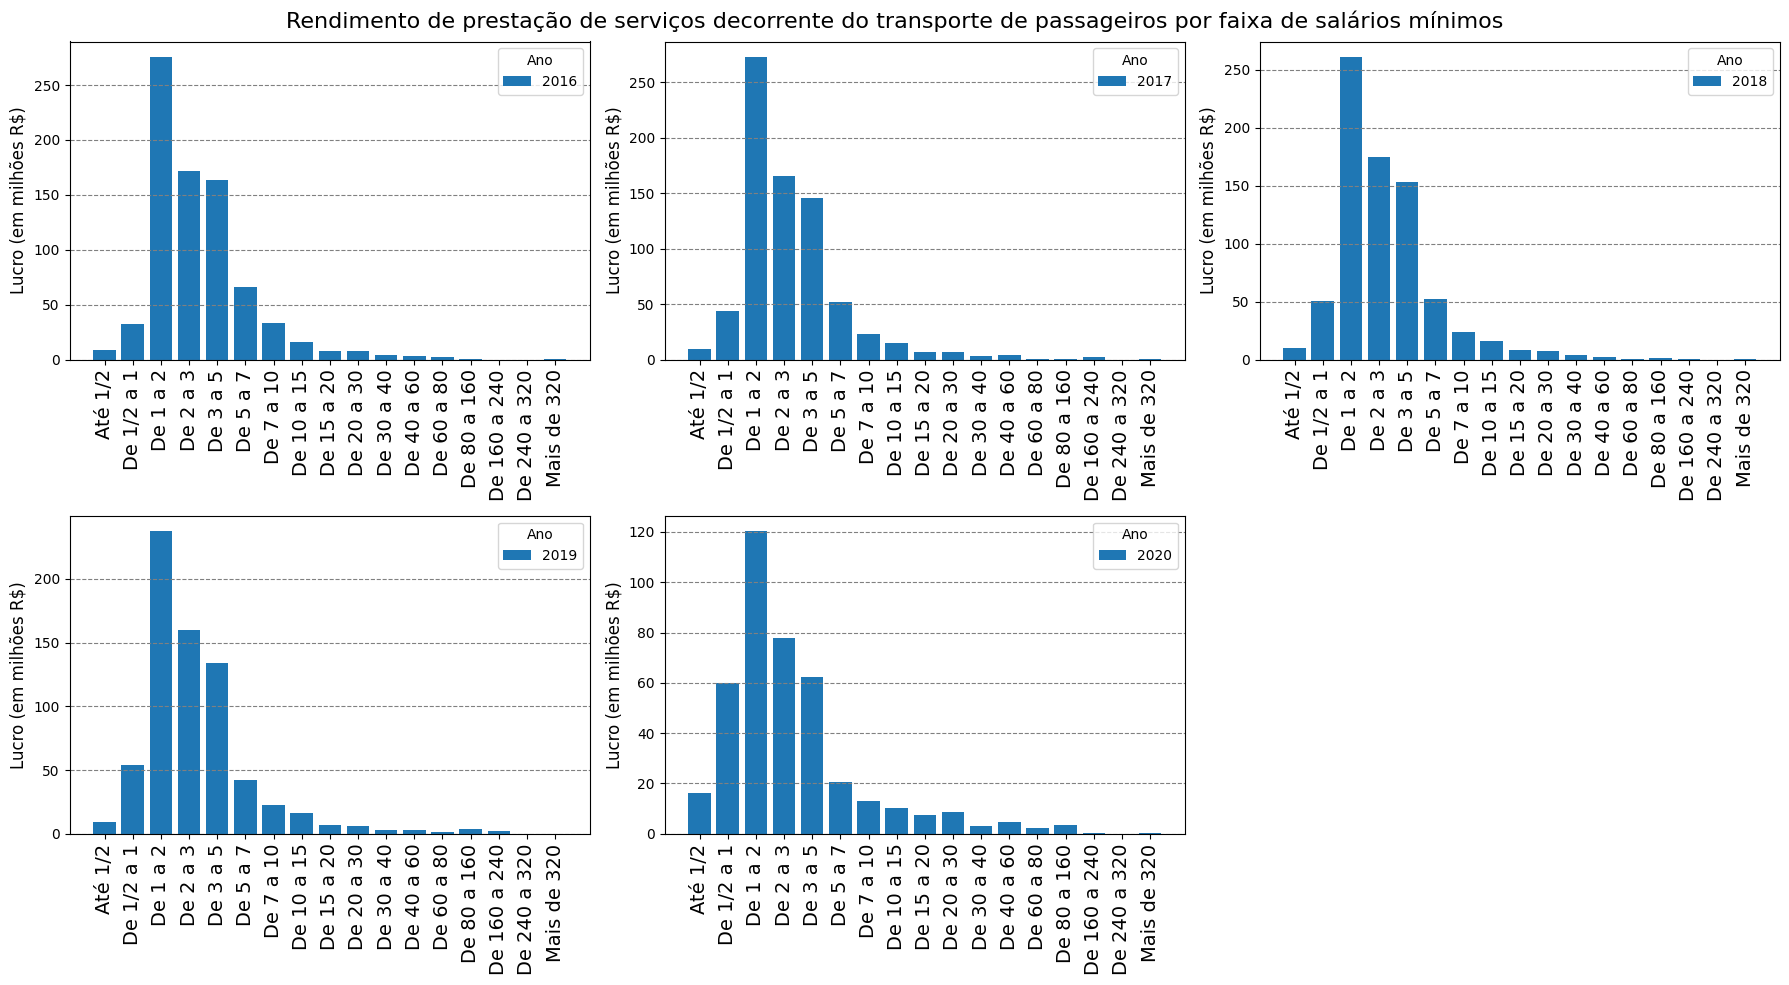

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(18,10))

anos = [2016, 2017, 2018, 2019, 2020]

for i, ano in enumerate(anos):
    lin = i//3
    col = i%3

    ax[lin,col].bar(data[data['Ano Calendário']==ano]['Faixa de Salários-Mínimos'],
                data[data['Ano Calendário']==ano]['col3'], label=f'{ano}')
    ax[lin,col].tick_params(axis='x',rotation=90, labelsize=14)
    ax[lin,col].set_ylabel('Lucro (em milhões R$)', fontsize=12)
    ax[lin,col].legend(title='Ano', loc='upper right')
    ax[lin,col].grid(axis='y', linestyle='--', color='gray', alpha=1)

ax[1, 2].axis('off')

plt.suptitle('Rendimento de prestação de serviços decorrente do transporte de passageiros por faixa de salários mínimos', fontsize=16)
plt.tight_layout()

plt.show()

No gráfico acima, é possível observar que, a partir de rendimentos entre "1 e 2" salários mínimos, houve uma redução nos rendimentos ao longo de 2020. Por outro lado, abaixo desse valor, houve um aumento nos rendimentos.

## Insight 3

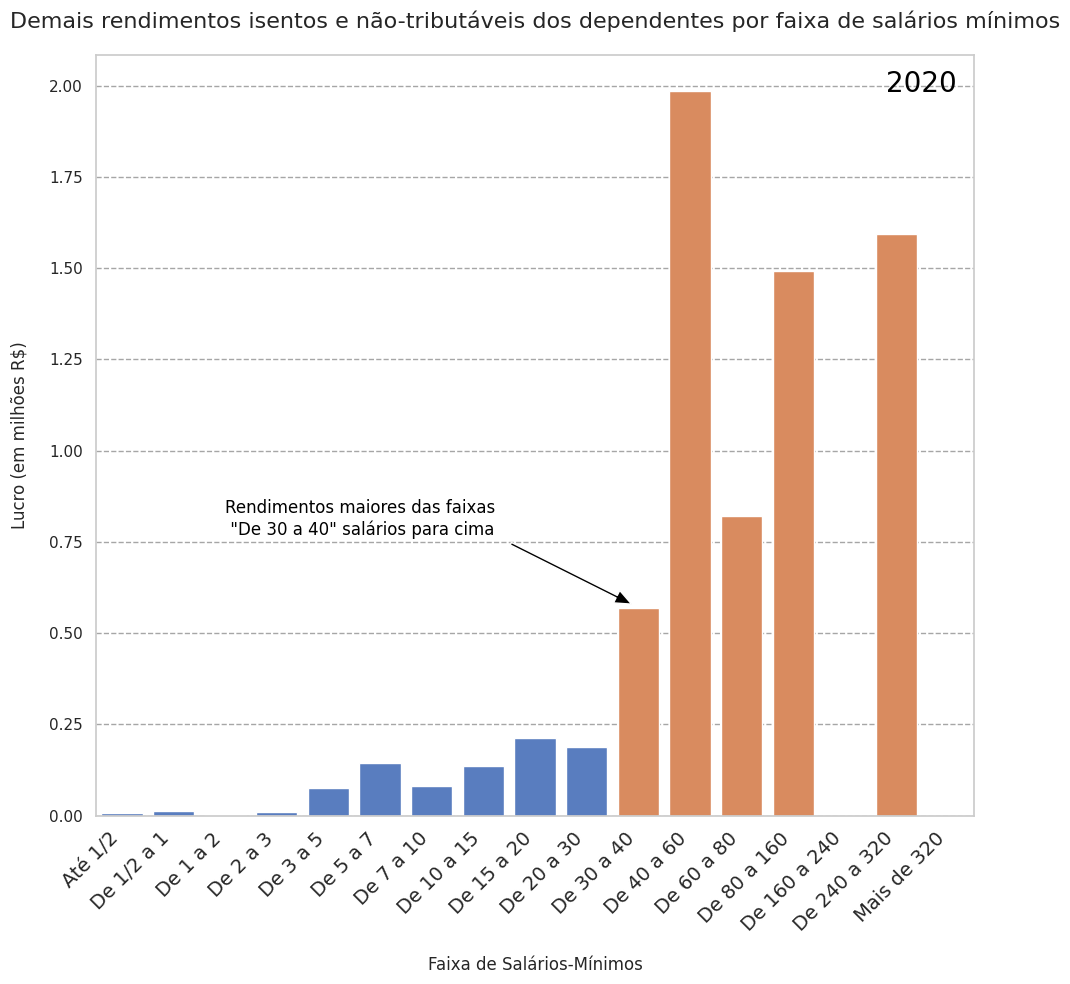

In [ ]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(10, 10))

faixa_alvo = ['De 30 a 40', 'De 40 a 60', 'De 60 a 80', 'De 80 a 160', 'De 160 a 240',
              'De 240 a 320', 'Mais de 320']

data['Cor'] = data['Faixa de Salários-Mínimos'].apply(
    lambda x: 'orange' if x in faixa_alvo else 'teal'
)

ax = sns.barplot(
    x='Faixa de Salários-Mínimos',
    y='col8',
    data=data[data['Ano Calendário'] == 2020],
    hue='Cor',
    dodge=False,
    legend=False
)

ax.set_xlabel('Faixa de Salários-Mínimos', fontsize=12, labelpad=15)
ax.set_ylabel('Lucro (em milhões R$)', fontsize=12, labelpad=15)
plt.title('Demais rendimentos isentos e não-tributáveis dos dependentes por faixa de salários mínimos',
          fontsize=16, pad=20)

faixa = 'De 30 a 40'

x_pos = data[data['Faixa de Salários-Mínimos'] == faixa].index[0]

y_pos = data[(data['Ano Calendário'] == 2020) & (data['Faixa de Salários-Mínimos'] == faixa)]['col8'].values[0]

ax.annotate('Rendimentos maiores das faixas \n "De 30 a 40" salários para cima',
            xy=(x_pos, y_pos),
            xytext=(x_pos - 8, y_pos + 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=10),
            fontsize=12, color='black')

ax.text(0.98, 0.98, '2020', ha='right', va='top', transform=ax.transAxes, fontsize=20, color='black')

# plt.legend(loc='upper right', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=14)

plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

plt.tight_layout()

plt.show()

### Quanto maior a faixa salarial, maiores são os rendimentos devido a alguns fatores:

* Estrutura de Renda Diversificada: Pessoas com rendas mais altas tendem a ter uma estrutura financeira mais complexa, com fontes de rendimento variadas, como investimentos, imóveis, empresas ou ativos financeiros. Isso pode incluir rendimentos isentos ou não-tributáveis para os dependentes (por exemplo, rendimentos de uma empresa familiar, dividendos isentos, ou rendimentos de poupança).

* Investimentos em Educação e Saúde: Pessoas mais ricas podem investir mais em educação, saúde e outras despesas que podem gerar rendimentos isentos, como bolsas de estudo ou planos de saúde pagos para dependentes. Esses rendimentos podem ser classificados como isentos e não-tributáveis, dependendo da sua natureza.

* Planejamento Tributário: Indivíduos com alta renda frequentemente utilizam o planejamento tributário, o que envolve a estratégia de alocar e distribuir rendimentos de maneira que o Imposto de Renda seja minimizado, utilizando recursos legais como a isenção de determinados tipos de rendimento para dependentes.

**OBS**  'De 160 a 240' e 'Mais de 320' salários mínimo estão com valor 0, talvez por não ter os dados referentes a essas faixas salariais.

 **OBS**  Não tem dados referentes aos anos anteriores.

## Insight 4

In [ ]:
df1=pd.DataFrame()
df1 = receita.copy()
classe_dicionario =  {'Até 1/2' : 'Classe E', 'De 1/2 a 1' : 'Classe E', 'De 1 a 2' : 'Classe E', 'De 2 a 3' : 'Classe D', 'De 3 a 5': 'Classe D',
       'De 5 a 7' : 'Classe C', 'De 7 a 10' : 'Classe C', 'De 10 a 15' : 'Classe B', 'De 15 a 20' : 'Classe B', 'De 20 a 30' : 'Classe A',
       'De 30 a 40': 'Classe A', 'De 40 a 60': 'Classe A', 'De 60 a 80': 'Classe A', 'De 80 a 160': 'Classe A',
       'De 160 a 240': 'Classe A', 'De 240 a 320': 'Classe A', 'Mais de 320': 'Classe A'}
df1['Classe'] = df1['Faixa de Salários-Mínimos'].map(classe_dicionario)

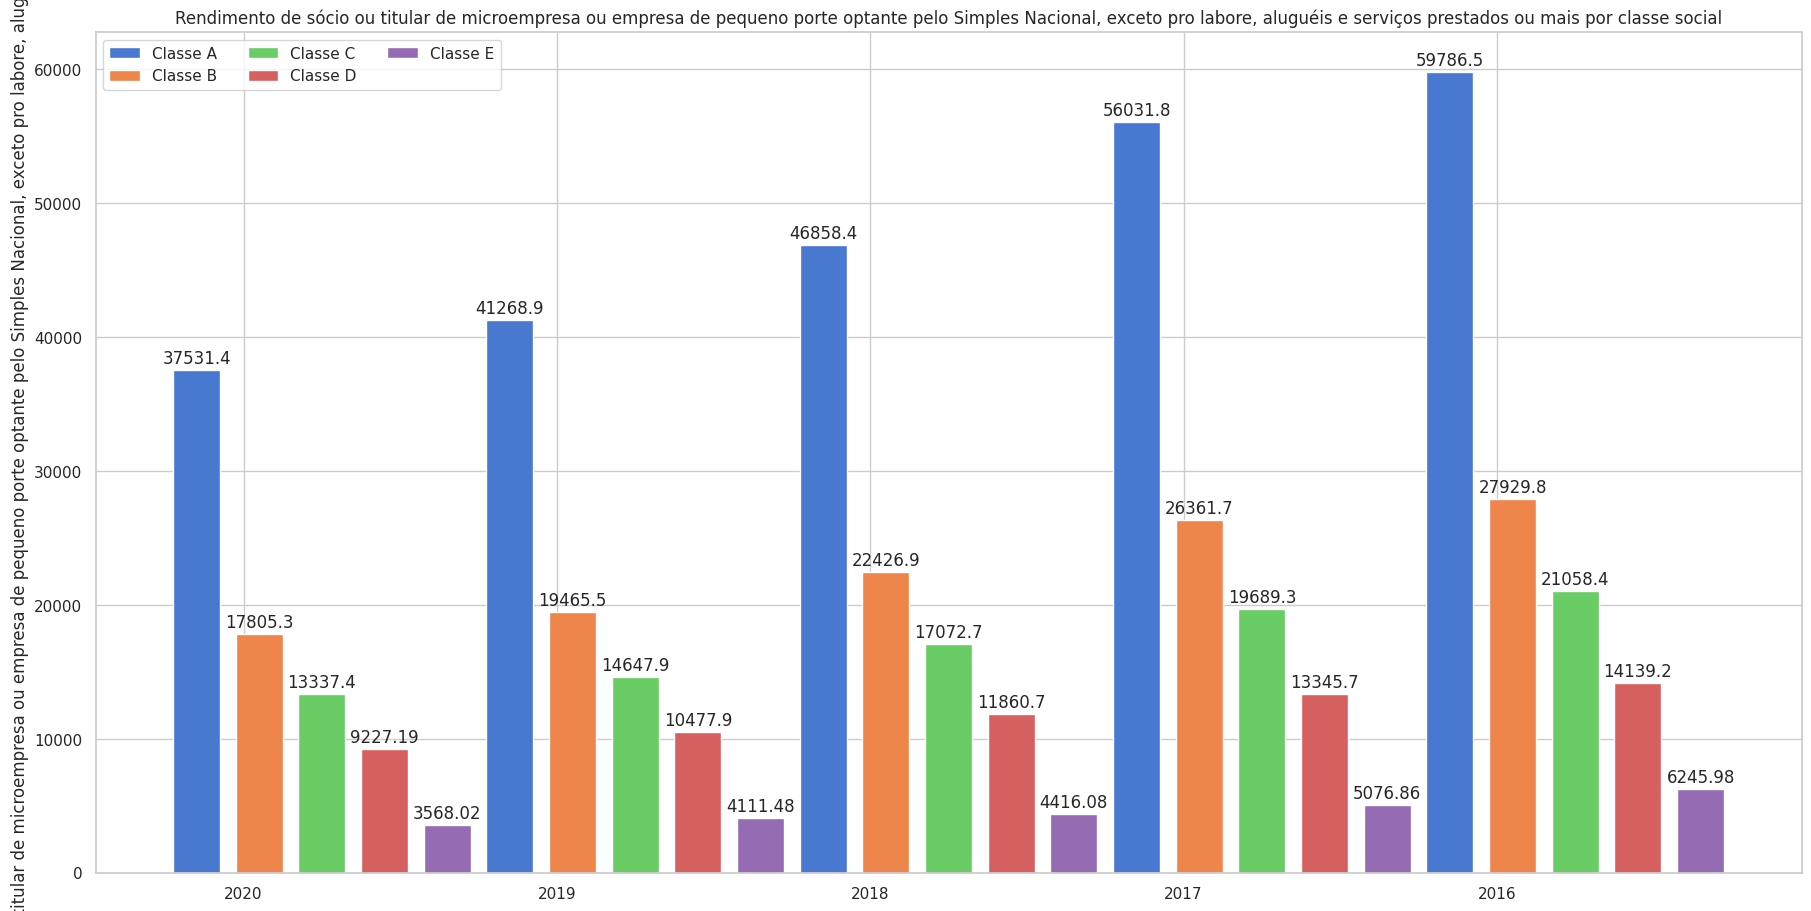

In [ ]:
x = np.arange(len(df1['Ano Calendário'].unique()))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(18, 9))


for classe, group in df1.groupby('Classe'):
    offset = 0.2 * multiplier
    # Selecting the relevant column for bar heights
    heights = group['Rendimento de sócio ou titular de microempresa ou empresa de pequeno porte optante pelo Simples Nacional, exceto pro labore, aluguéis e serviços prestados'].groupby(group['Ano Calendário']).sum().values
    rects = ax.bar(x+offset, heights, width, label=classe)
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_ylabel('Rendimento de sócio ou titular de microempresa ou empresa de pequeno porte optante pelo Simples Nacional, exceto pro labore, aluguéis e serviços prestados')
ax.set_title('Rendimento de sócio ou titular de microempresa ou empresa de pequeno porte optante pelo Simples Nacional, exceto pro labore, aluguéis e serviços prestados ou mais por classe social')
ax.set_xticks(x + width, df1['Ano Calendário'].unique())
ax.legend(loc='upper left', ncols=3)


plt.show()

**Observação 1** - O Rendimento como sócio de microempresa ou empresa de pequeno porte vem diminuindo com o passar dos anos.

**Observação 2** - A classe E e D, como esperado, devido a condição social são as classe que possuem menos rendimento nessa categoria.

**Observação 3** - Por mais que os MEIs se concentrem na faixa de até 4 salários mínimos por mês, nessa categoria de rendimento eles não são significativos devido a não contribuição de lucro advindo de serviços nessa categoria.